<a href="https://colab.research.google.com/github/LuisaBeccar/Proyecto_CD_III_LuisaBeccarVarela/blob/main/ProyesctoDS_ParteIII_LuisaBeccarVarela_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP FINAL - CIENCIA DE DATOS 61140 - CODERCHOUSE 2024**

LUISA BECCAR VARELA

**Sobrevida de pacientes con Cancer de mama a 5 años del diagnostico**

<br>


**OBJETIVO**: predecir si una mujer de entre 30 y 69 años de edad con cancer de mama sobrevivirá 60 meses (5 años) del diagnosico, considerando caracteristicas del tumor y de la paciente.

<br>

# Base de datos
<br>
De: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

<br>

Segun el repositorio de keagle, el dataset se obtuvo de la actualizacion del programa SEER del National Cancer Institute en noviembre 2017, que da informacion de estadisticas de pacientes con cancer.
<br>
Se trata de diagnosticos de mujeres con carcinoma ductal infiltrante y carcinoma lobular de mama, recolectados entre el 2006 y 2010. Se excluyeron registros de pacientes con tamaño tumoral desconocido, sin ganglios regionales examinados, sin gangilios regionales positivos y cuyos meses de supervivencia fueran menores de uno.

<br>
En el siguiente link se ve la documentacon oficial de la base
<br>
https://ieee-dataport.org/open-access/seer-breast-cancer-data
<br>

# Descripcion

Cuando se estudia un cancer de mama, se usan distintas clasificaciones que describen la gravedad y malignidad del tumor:
- El tamaño y la cantidad de ganglios regionales positivos se usan para determinar el T y el N respectivamente, y luego estos parametros junto con el M (aqui "A Stage": si hay metastasis a distancia: diseminado) determinan el 6th Stage: estadio clinico.
- Luego de una biopsia, se puede analizar las celulas que componen el tumor y segun sus caracteristicas de determina el grado de differenciacion (bien diferenciado, moderadamente diferenciado, pobremente diferenciado o indiferenciado/anaplasico) La gravedad aumenta cuanto menos diferenciado sea.
- La cantidad de ganglios linfaticos afectados habla de la diseminacion del tumor, por lo cual más tambien es peor.
- Determinar si tiene o no receptores hormonales de Estrogenos y Progesagenos cobra importancia para el tratamiento de elección, ya que existen farmacos específicos dirigidos a estos receptores.
- La raza y la edad de la paciente podrian influir en el tipo de cancer que desarrolla la paciente.
- No creemos que el estado civil tenga influencia en la enfrmedad.

# Hipotesis
Considerando lo expuesto previamente, para determinar si una paciente estara viva o no a 5 años del diagnostico (60 meses), se podrian generar las siguientes hipotesis: <br>

- Tamaños tumorales más grandes se asocian a peor grado de diferenciacion (Differentiate) y estadio clinico (6th Stage) y por lo tanto a peor supervivencia.
    - Histograma tamaños tumorales
    - Boxplot tamaños tumorales segun Differentiate y segun 6th Stage
    - Tamaño tumoral o T Stage vs Supervivencia o Survival Months
<br>
- Más ganglios linfaticos positivos (Regional Node Positve) en pacientes con menor sobrevida o Survival Months
<br>
- Sujetos con marcadores hormonales positivos ya sea de progesterona o estrogenos (Estrogen Status, Progesterone Status) tiene mayor sobrevida (Survival Months) debido a que hay trataminetos especificos dirigidos a estos tipos de tumores.
    - ER PR +/-: Meses de sobrevida, Status (Dead o Alive).

<br>
-----
<br>

### Atributos de la base orignal "Breast Cancer":

- Age (edad): edad de los sujetos: 30-69 años <br>
- Race (raza): raza de los sujetos: White, Black, Other (American Indian/AK Native, Asian/Pasific Islander) <br>
- Marital Status (estado civil): Married (casado), Single (soltero), Divorced (divorciado), Widowed (enviudado), Separated (separado) <br>
- T Stage (estadio T): clasificacion tumoral segun tamaño de la masa tumoral: T1, T2, T3, T4 *<br>
- N Stage (estadio N): clasificacion tumoral segun nodulos linfaticos afectados por tumor: N1, N2, N3 * <br>
- 6th Stage (estadio clinico): en base al T, N y M: IIA, IIB, IIIA, IIIB, IIIC * <br>
- differrentiate (grado de diferenciacion): de las celulas del tumor observadas en la biopsia: Poorly differentiated, Moderately differentiated, Well differentiated, Undifferentiated. Luego le corregí el nombre de la variable a "Differentiate"
- Grade: grado del tumor segun caracteristicas su celulas: 1, 2, 3, 4 o anaplasico * <br>
- A Stage: estadio de diseminacion: Regional o Distant (diseminado) con metastasis a distancia. <br>
- Tumor Size (tamaño tumoral): en milimetros (de 1  a 140mm) <br>
- Estrogen Status (estado estrogenico): si tiene receptores hormonaes estrogenicos o no: Positive o Negative <br>
- Progesterone Status (estado progestageno): si tiene receptores hormonaes de progesterona o no: Positive o Negative <br>
- Regional Node Examined: numero de nodulos linfaticos regionales examinados (1-61 nodulos) <br>
- Reginol Node Positive: cantidad de ganglios regionales examinados que resultaron positivos a malignidad (1 a 46) - Luego le corregí el nombre a "Regional Node Positive" <br>
- Survival Months: meses de sobrevida del suejeto (1 a 107)  <br>
- Status: estado actual: Alive (vivo) o Dead (murió) <br>
<br>

-----
Algunas consideraciones:
La base original tiene 4024 observacions y 16 atributos y no tiene datos faltantes.
<br>

Las variables originales se pueden clasificar en:
<br>

Atributos cuantitativos:<br>
  - Continuos (3): Age, Tumor Size, Survival Months <br>
  - Discretos (2): Regional Node Examined, Regional Node Positive <br>
Atributos categoricos:<br>
 - Nominales:
      - Binarios (5): Estrogen Status, Progesterone Status, Status, A State, Sobrevida.
      - Multicategoricos (2): Race, Marital Status. <br>
 - Ordinales (4): N Stage, 6th Stage, Differentiate, Grade <br>


## EDA
<br>
Se creara la variable objetivo (target feature) Sobrevida: cualitativa binaria: True (1) si la paciente tuvo Survival Months mayor o igual a 60 meses, y  False (0) si sus Survival Months fueron menores de 60 meses.

<br>
Conociendo que hay ciertas relaciones entre las variables, propongo considerer lo siguiente: <br>

- La cantidad de Regional Node Examined determina directamente la maxima cantidad de Regional Node Positive. Por lo tanto propongo crear una nueva variable: RNP/RNE. Y conservar solo la variable RNE. <br>

- Tumor Size y T Stage estan relacionadas ya que las categorias de T Stage se establen según el tamaño tumoral(mm), excepto para la categoria T4 donde puede tener el tumor cualquier tamaño. <br>

- 6th Stage es una combinacion de las clasificaciones TNM. Por lo cual podria utilizarse en resumen de las variables: T Stage, N Stage y A Stage.<br>

- Grade y Differentiate son el mismo criterio de clasificacion, por lo cual eliminare una de las dos para evitar redundancia. (Elijo eliminar Grade).<br>

- La variable Status: si la paciente esta viva o murio no puede interpretarse ya que no sabemos el momento de la toma de datos. Propongo eliminarla del análisis. <br>

____


# Contexto Comercial / Utilidad del análisis
La predicción seria util para los médicos especialistas a la hora de comunicarle el pronóstico a sus pacientes. Esto les permitiria a las pacientes poder pensar en cómo vivir sus años siguientes.
Sin embargo cabe recalcar que en ningun momento se aclara si las mujeres de las cuales se obtuvieron los datos recibieron tratamiento ni cual. Asi sucede que no sabemos si la sobrevida estimada es con o sin tratamietno ni cómo afecta el tratamiento su calidad de vida.



In [1]:
# importo librerias

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")


# Breast_Cancer

In [2]:
url = 'https://raw.githubusercontent.com/LuisaBeccar/Clases-de-CoderHouse-Data-Science/main/Breast_Cancer.csv'
df = pd.read_csv(url)
df

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

In [3]:
# Creacion de mi variable objetivo, y edicion de otras features

# Agrego variable objetivo Sobrevida si "survival months" > 60 meses (5 años)
Sobrevida = []
for i in df["Survival Months"]: #para cada elemento de "survival months", evalua si es mayor a 60 meses (5 años) (TRUE) y el resultado booleano (TRUE O FALSE) agregalo a la lista "Sobrevida"
    Sobrevida.append(i >= 60)
Sobrevida = pd.Series(Sobrevida)
df["Sobrevida"] = Sobrevida

# modificar el nombre de Reginol Node Positive por Regional Node Positive
df.rename(columns={'Reginol Node Positive':'Regional Node Positive'}, inplace=True)

# modificar el nombre de "differentiate" por "Differentiate" sin espacio final
df.rename(columns={'differentiate':'Differentiate'}, inplace=True)

# eliminar la columna Grade porque habla de lo mismo que Differentiate
df.drop('Grade', axis=1, inplace=True)

# relacion RNP y RNE: ya que el maximo de RNP depende de RNE
df["RNP/RNE"] = df["Regional Node Positive"] / df["Regional Node Examined"]



In [4]:
# renombrar nombre de columnas sin espacios en blanco antes o despues
columnas = df.columns

for columna in columnas:
    sin_espacio = columna.strip()
    if sin_espacio!=columna:
        df= df.rename(columns = {columna: sin_espacio})


In [5]:
# Encontre valores que tenian un espacio invisible al final que dificultava el trabajo con datos,
""" para solucionar esto encontre este metodo que crea una funcion para sacar espacion pre y post
strings de objetos, a la cual se le pasa el dataframe como unico parametro """

def whitespace_remover(miDataFrame): # defino la funcion
    for i in miDataFrame.columns:  # para cada columna
        if miDataFrame[i].dtype == 'object': # chequiar que sea tipo objeto
            miDataFrame[i] = miDataFrame[i].map(str.strip) # aplicarle la fx strip asl string
        else: # si no es objeto el dato pasa al siguiente
            pass

# applying whitespace_remover function on dataframe
whitespace_remover(df)


## df: info & describe

In [ ]:
print(df.info())
print("--------------------------------------")
print(df.describe())
print("--------------------------------------")
print(df.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   Differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Regional Node Positive  4024 non-null   int64  
 14  Survival Months         4024 non-null   

Aqui vemos una descripcion de la base de 2024 observaciones con los atributos agregados: 18 variables. <br>
Caracteristicas personales de la paciente: Age, Race, Marital Status. <br>
Caracteristicas del tumor: Tumor Size, T Stage, N Stage, A Stage, 6th Stage, Differentiate, Grade, Estrogen Status, Progesterone Status, Regional Node Examined, Regional Node Positive, RNP/RNP <br>
Caracteristicas de hablan de la supervivencia: Survival Months, Sobrevida, Status

Algunas observaciones:
Grade y Differentiate tienen misma cantidad de observaciones para su maxima categoria (Grade 2 y Moderately Differentiated respectivamente) (luego venermos que para todas sus categorias)

# 🧽 Cleaning data: NANS y valores erroneos de df

Como mi base de datos original no tinee datos faltantes ni errores, a fines didacticos y usar funciones aprendidas para limpieza de datos planteare situaciones ficticias...

A) Digamos que al analizar los "Marital Status" de las pacientes consideramos que en vez de saber si es Divorciada, Separada o Viuda, solo queremos que diga "Married" o "Single", incluyendo en este Single todas las opciones mencionadas previamente. Entonces, queremos trasnformar "Divorced", "Widowed" y "Separated" en "Single",haciendo un camino largo: <br>
 1) Reemplazaré los "Divorced", "Widowed" y "Separated" por Nans <br>
 2) y luego esos Nans por "Single". <br>
 3) Eliminare la variable Marital Status por no considerarla relevante para la supervivencia de las pacientes con cancer de mama.
 <br>

B) Supongamos que tampoco me interesan las pacientes que sobrevivieron menos de 3 meses: <br>
 1) Reemmplazare los valores de Survival Months menores o iguales a 3 por Nan <br>
 2)Transformare esos Nans a valores ceros, que quedan como float y luego esos ceros a type int. *dfR0*
 <br>
 3) Con simpleimputer reemplazare valores faltantes, usando como 'strategy' la moda creando el nuevo dataframe *dfRmoda*.<br>
 4) Disconforme con esta manera de tratar los datos, terminaré por eliminar de la base las filas con 0 en Survival Months que quedaron en *dfR0* en el punto B2

In [6]:
# para esta linea de analisis hare una copia del df que venia trabajando y la llamares dfR

dfR = pd.DataFrame(df)


In [7]:
# corroboro que no hay datos faltantes de otra manera distinta a info()

print("Con isnull y sum:")
print(dfR.isnull().sum())
print("-----------------")
print("Con isna y any:")
print(dfR.isna().any())

Con isnull y sum:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
Sobrevida                 0
RNP/RNE                   0
dtype: int64
-----------------
Con isna y any:
Age                       False
Race                      False
Marital Status            False
T Stage                   False
N Stage                   False
6th Stage                 False
Differentiate             False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Regional Node Positive    False
Survival Months           False
Status     

Comienzo trabajando los datos de Marital Status

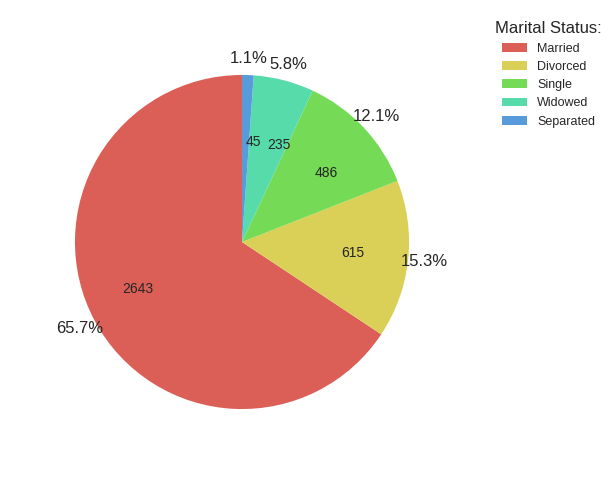

In [8]:

from ssl import PEM_cert_to_DER_cert
# PIE CHART Marital Status

def tortaMarital (x):
    serie_estatus = x["Marital Status"].value_counts()
    serie_estatus
    categorias = x["Marital Status"].unique()

    fig,ax = plt.subplots(figsize =(8,5))
    fig.set_facecolor('w')
    ax.pie(serie_estatus, labels=serie_estatus, labeldistance=0.6, autopct= "%1.1f%%", radius=0.90, startangle=90, pctdistance = 1.1, colors=sns.color_palette("hls",7))
    plt.legend(categorias,  bbox_to_anchor =(1.30,1), loc='upper right',  fontsize=9, title= "Marital Status:")
    plt.tight_layout()
    plt.show()

tortaMarital(df)

In [9]:
print(dfR["Marital Status"].value_counts())

# A1) reemplazo Separada, Viudas y Divorciadas por Nans (sabiendo previamente que no tenia datos Nans en mi base)
dfR['Marital Status']= dfR['Marital Status'].replace(["Separated","Widowed","Divorced"], np.nan)

# veo cuantos Nans tengo ahora: se que esos nans son exclusivamente los que acabo de crear
print(dfR['Marital Status'].isnull().sum())

print(dfR["Marital Status"].value_counts()) # cheqeo como queda el conteo


Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
766
Marital Status
Married    2643
Single      615
Name: count, dtype: int64


0
1381
4024
Marital Status
Married    2643
Single     1381
Name: count, dtype: int64


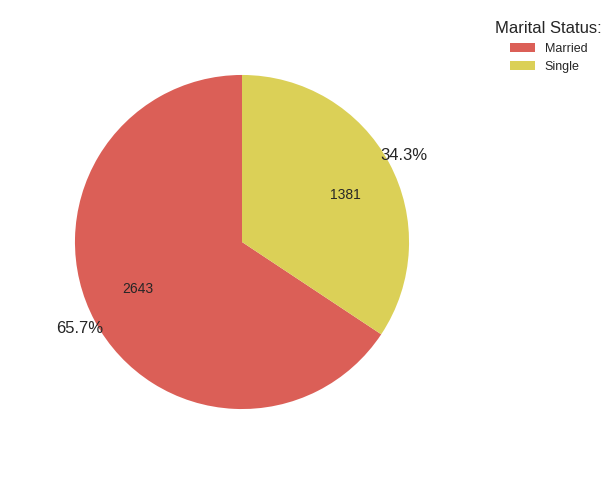

In [10]:
# A2) Reemplazo Nans por "Single"

dfR['Marital Status'].fillna("Single", inplace=True)

print(dfR['Marital Status'].isnull().sum())
print((dfR['Marital Status']=="Single").sum())

# corroboro que ahora tengo 1382 Separated y quedaron mis 2643 Married suman el total de mis observaciones
print((dfR['Marital Status']=="Single").sum() + (dfR['Marital Status']=="Married").sum()) #4024

print(dfR["Marital Status"].value_counts()) # cheqeo como queda el conteo
tortaMarital(dfR)

In [11]:
# A3) eliminar columna de dataset
dfR = dfR.drop(columns="Marital Status", axis=1)


In [12]:
dfR

Age   Race T Stage N Stage 6th Stage              Differentiate  \
0      68  White      T1      N1       IIA      Poorly differentiated   
1      50  White      T2      N2      IIIA  Moderately differentiated   
2      58  White      T3      N3      IIIC  Moderately differentiated   
3      58  White      T1      N1       IIA      Poorly differentiated   
4      47  White      T2      N1       IIB      Poorly differentiated   
...   ...    ...     ...     ...       ...                        ...   
4019   62  Other      T1      N1       IIA  Moderately differentiated   
4020   56  White      T2      N2      IIIA  Moderately differentiated   
4021   68  White      T2      N1       IIB  Moderately differentiated   
4022   58  Black      T2      N1       IIB  Moderately differentiated   
4023   46  White      T2      N1       IIB  Moderately differentiated   

       A Stage  Tumor Size Estrogen Status Progesterone Status  \
0     Regional           4        Positive            Positive   
1     Regional          35        Positive            Positive   
2     Regional          63        Positive            Positive   
3     Regional          18        Positive            Positive   
4     Regional          41        Positive            Positive   
...        ...         ...             ...                 ...   
4019  Regional           9        Positive            Positive   
4020  Regional          46        Positive            Positive   
4021  Regional          22        Positive            Negative   
4022  Regional          44        Positive            Positive   
4023  Regional          30        Positive            Positive   

      Regional Node Examined  Regional Node Positive  Survival Months Status  \
0                         24                       1               60  Alive   
1                         14                       5               62  Alive   
2                         14                       7               75  Alive   
3                          2                       1               84  Alive   
4                          3                       1               50  Alive   
...                      ...                     ...              ...    ...   
4019                       1                       1               49  Alive   
4020                      14                       8               69  Alive   
4021                      11                       3               69  Alive   
4022                      11                       1               72  Alive   
4023                       7                       2              100  Alive   

      Sobrevida   RNP/RNE  
0          True  0.041667  
1          True  0.357143  
2          True  0.500000  
3          True  0.500000  
4         False  0.333333  
...         ...       ...  
4019      False  1.000000  
4020       True  0.571429  
4021       True  0.272727  
4022       True  0.090909  
4023       True  0.285714  

[4024 rows x 16 columns]

Ahora voy a trabajar los datos de suevival months

In [13]:
# B1) transfromar Survival Months menores o iguales  de 3 en nan. Nan es float

print((dfR['Survival Months']<= 3).sum()) #  8 registros con Survival Months menor o igual a 3 meses

dfR['Survival Months']= dfR['Survival Months'].where(dfR["Survival Months"] > 3, np.nan)
print(dfR['Survival Months'].isnull().sum()) # 8

print(dfR.isnull().sum())
print(dfR.isna().any())

# queda dfR con 8 nulls en survival months

8
8
Age                       0
Race                      0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           8
Status                    0
Sobrevida                 0
RNP/RNE                   0
dtype: int64
Age                       False
Race                      False
T Stage                   False
N Stage                   False
6th Stage                 False
Differentiate             False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Regional Node Positive    False
Survival Months            True
Status                    False
Sobrevida                 False
RNP/RNE                   False
dtype: bool


In [14]:
# B2)
# Defino una nueva base dfR0 que quedara con ceros en el lugar de esos "Survival Months" menores a 3 que habian sido reemplazados por nanas
dfR0 = dfR
#reemplazar nanspor ceros y cambiar tipo de float a int
dfR0['Survival Months'] = dfR['Survival Months'].fillna(0)

dfR0['Survival Months'] = dfR['Survival Months'].astype(int)
dfR0.dtypes
# quedaron 8 ceros en lugar de esos 8 nans, y la variable es tipo int, sin datos nulos
print(dfR0.isnull().sum())
print(dfR0.isna().any())


Age                       0
Race                      0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
Sobrevida                 0
RNP/RNE                   0
dtype: int64
Age                       False
Race                      False
T Stage                   False
N Stage                   False
6th Stage                 False
Differentiate             False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Regional Node Positive    False
Survival Months           False
Status                    False
Sobrevida                 False
RNP/RNE                   False
dtype: bool


In [15]:
# Dropear la filas con cero en Survival Months

df0 = dfR.drop(dfR0[(dfR0["Survival Months"] == 0)].index)
df0.shape

(4016, 16)

In [16]:
# B2) Scikit-learn  para reemplazar estos Survival Months Nan en dfR por la moda
print(dfR.shape)
dfRmoda = dfR # creo una nueva base dfRmoda para que no me pise a dfR

print(dfRmoda["Survival Months"].mode()) # la moda 69
print(dfRmoda["Survival Months"].value_counts()) # la moda es 69, se repite 81 veces



(4024, 16)
0    69
Name: Survival Months, dtype: int64
Survival Months
69     81
102    73
56     73
63     73
98     72
       ..
19      5
32      5
26      5
7       5
11      4
Name: count, Length: 105, dtype: int64


In [17]:
print("-------------")
### NO SALIOO, una vez si y despues no lo hizo mas

from sklearn.impute import SimpleImputer

valores = dfRmoda["Survival Months"].values.reshape(-1,1) # columna en array 2D
# definir el imputador
imputador = SimpleImputer(missing_values = np.nan, strategy="most_frequent" ) # probe con strategy="constant", fill_value=69 (a mano le pongo la moda que calcule antes,  y tampoco salio)
# transformar el array
SMimputado = imputador.fit_transform(valores)
dfRmoda["Survival Months"] = SMimputado

dfRmoda = dfRmoda.rename(columns={0:'Age', 1:'Race', 2:'Marital Status', 3:'T Stage',
                                   4:'N Stage', 5:'6th Stage', 6:'Differentiate', 7:'Grade',
                                   8:'A Stage', 9:'Tumor Size', 10:'Estrogen Status',
                                   11:'Progesterone Status', 12:'Regional Node Examined',
                                   13:'Reginol Node Positive', 14:'Survival Months',
                                   15:'Status', 16:'Sobrevida'})

print(dfRmoda["Survival Months"].value_counts())


-------------
Survival Months
69     81
102    73
56     73
63     73
98     72
       ..
19      5
32      5
26      5
7       5
11      4
Name: count, Length: 105, dtype: int64


Lo que deberia suceder es que se cambien los ceros por el valor de la moda:69 y ahora haya 89 veces el valor 69 meses de supervivencia.
(# Pero no logro decifrar por que no anda)

In [18]:
# B3) Eliminar filas de Survival Months = Nan de B1 dfR  !!! NO ME LOS DROPEAAA

dfR_na = dfR.dropna().reset_index(drop=True)
dfR_na


Age   Race T Stage N Stage 6th Stage              Differentiate  \
0      68  White      T1      N1       IIA      Poorly differentiated   
1      50  White      T2      N2      IIIA  Moderately differentiated   
2      58  White      T3      N3      IIIC  Moderately differentiated   
3      58  White      T1      N1       IIA      Poorly differentiated   
4      47  White      T2      N1       IIB      Poorly differentiated   
...   ...    ...     ...     ...       ...                        ...   
4019   62  Other      T1      N1       IIA  Moderately differentiated   
4020   56  White      T2      N2      IIIA  Moderately differentiated   
4021   68  White      T2      N1       IIB  Moderately differentiated   
4022   58  Black      T2      N1       IIB  Moderately differentiated   
4023   46  White      T2      N1       IIB  Moderately differentiated   

       A Stage  Tumor Size Estrogen Status Progesterone Status  \
0     Regional           4        Positive            Positive   
1     Regional          35        Positive            Positive   
2     Regional          63        Positive            Positive   
3     Regional          18        Positive            Positive   
4     Regional          41        Positive            Positive   
...        ...         ...             ...                 ...   
4019  Regional           9        Positive            Positive   
4020  Regional          46        Positive            Positive   
4021  Regional          22        Positive            Negative   
4022  Regional          44        Positive            Positive   
4023  Regional          30        Positive            Positive   

      Regional Node Examined  Regional Node Positive  Survival Months Status  \
0                         24                       1               60  Alive   
1                         14                       5               62  Alive   
2                         14                       7               75  Alive   
3                          2                       1               84  Alive   
4                          3                       1               50  Alive   
...                      ...                     ...              ...    ...   
4019                       1                       1               49  Alive   
4020                      14                       8               69  Alive   
4021                      11                       3               69  Alive   
4022                      11                       1               72  Alive   
4023                       7                       2              100  Alive   

      Sobrevida   RNP/RNE  
0          True  0.041667  
1          True  0.357143  
2          True  0.500000  
3          True  0.500000  
4         False  0.333333  
...         ...       ...  
4019      False  1.000000  
4020       True  0.571429  
4021       True  0.272727  
4022       True  0.090909  
4023       True  0.285714  

[4024 rows x 16 columns]

Con este metodo deberia eliminarme las filas  y corregir el indice, asi deberia quedar un dataframe de 4016 registros, pues sabemos que habiamos transformado 8 valores a nans




In [19]:
# B3 probando otro metodo: para eliminar / filtrar filas

dfR_filtrado = dfR[dfR["Survival Months"] >3]

print(dfR_filtrado.shape)

dfR_filtrado_reindexado = dfR_filtrado.reindex(index=None, columns=None, axis=0)
dfR_filtrado_reindexado

(4016, 16)


Age   Race T Stage N Stage 6th Stage              Differentiate  \
0      68  White      T1      N1       IIA      Poorly differentiated   
1      50  White      T2      N2      IIIA  Moderately differentiated   
2      58  White      T3      N3      IIIC  Moderately differentiated   
3      58  White      T1      N1       IIA      Poorly differentiated   
4      47  White      T2      N1       IIB      Poorly differentiated   
...   ...    ...     ...     ...       ...                        ...   
4019   62  Other      T1      N1       IIA  Moderately differentiated   
4020   56  White      T2      N2      IIIA  Moderately differentiated   
4021   68  White      T2      N1       IIB  Moderately differentiated   
4022   58  Black      T2      N1       IIB  Moderately differentiated   
4023   46  White      T2      N1       IIB  Moderately differentiated   

       A Stage  Tumor Size Estrogen Status Progesterone Status  \
0     Regional           4        Positive            Positive   
1     Regional          35        Positive            Positive   
2     Regional          63        Positive            Positive   
3     Regional          18        Positive            Positive   
4     Regional          41        Positive            Positive   
...        ...         ...             ...                 ...   
4019  Regional           9        Positive            Positive   
4020  Regional          46        Positive            Positive   
4021  Regional          22        Positive            Negative   
4022  Regional          44        Positive            Positive   
4023  Regional          30        Positive            Positive   

      Regional Node Examined  Regional Node Positive  Survival Months Status  \
0                         24                       1               60  Alive   
1                         14                       5               62  Alive   
2                         14                       7               75  Alive   
3                          2                       1               84  Alive   
4                          3                       1               50  Alive   
...                      ...                     ...              ...    ...   
4019                       1                       1               49  Alive   
4020                      14                       8               69  Alive   
4021                      11                       3               69  Alive   
4022                      11                       1               72  Alive   
4023                       7                       2              100  Alive   

      Sobrevida   RNP/RNE  
0          True  0.041667  
1          True  0.357143  
2          True  0.500000  
3          True  0.500000  
4         False  0.333333  
...         ...       ...  
4019      False  1.000000  
4020       True  0.571429  
4021       True  0.272727  
4022       True  0.090909  
4023       True  0.285714  

[4016 rows x 16 columns]

Por este metodo si veo que me elimina las filas, pero no logre la reindexacion.

# 🎨 Visualizaciones


## Tumor Size
<br>
Hipotesis:
<br>

Tamaños tumorales más grandes se asocian a peor grado de diferenciacion (Differentiate) y estadio clinico (6th Stage).
<br>

Histograma tamaños tumorales
Boxplot tamaños tumorales y segun Differentiate, 6th Stage y otras variables.

Text(0, 0.5, 'Cantidad')

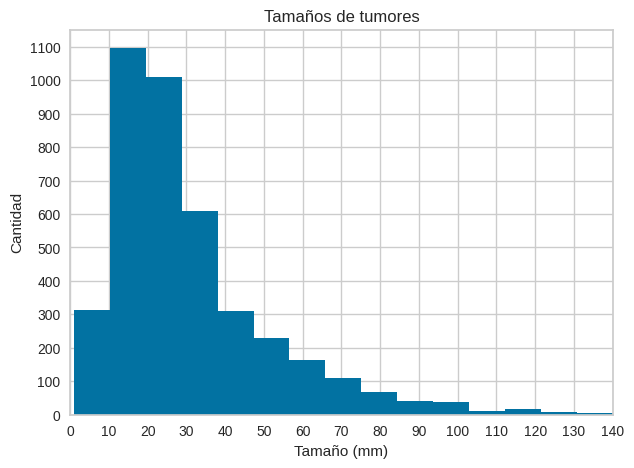

In [20]:
# Histograma matplotlib para ver frecuencia de los tamaños tumorales

# Totales
size = np.array(df['Tumor Size'])
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(size, bins=15)
ax.set_title('Tamaños de tumores')
ax.set_xlim([0,140])
ax.set_xticks(range(0, 141, 10))
ax.set_xlabel('Tamaño (mm)')
ax.set_yticks(range(0, 1200, 100))
ax.set_ylabel('Cantidad')


In [21]:
# Estadisticos de de tamaños tumorales

print(df['Tumor Size'].std().round(1))
print(df['Tumor Size'].mean().round(1))
print(df['Tumor Size'].median().round(1))

coef_var = df["Tumor Size"].std() / df['Tumor Size'].mean() *100
print(coef_var)

print(df["Tumor Size"].describe()) # otra forma sensilla de ver los estadisticos de mi variable


21.1
30.5
25.0
69.30476168824006
count    4024.000000
mean       30.473658
std        21.119696
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor Size, dtype: float64


La variable "Tumor Size" tiene una distribucion asimetrica a la derecha,
donde la mediana(25mm) es menor que la media (30.5mm).
El coeficiente de variacion de 69.3 me dice que es muy heterogenea mi muestra en cuanto a tamaños tumorales ya que es un valor mayor al 30%.

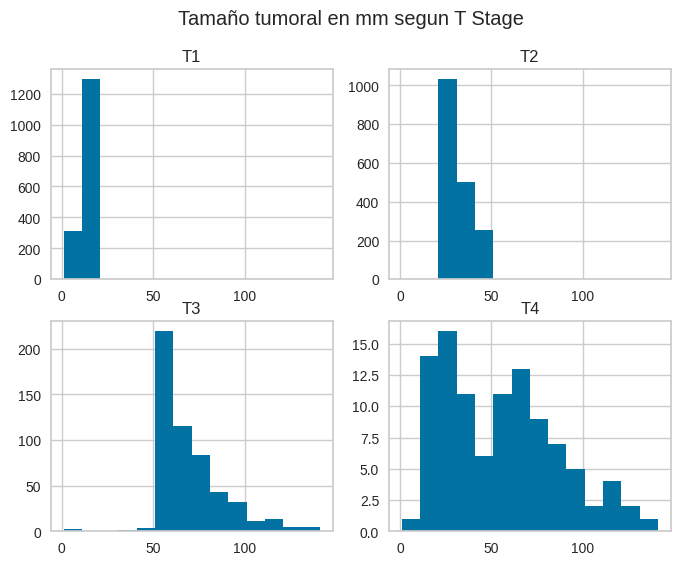

In [22]:
# Histogramas subplots COLS TAMAÑOS TUMORALES SEGUN T STAGE

bin_width = 10
bin_range = range(1, 150, bin_width)
fig, axs = plt.subplots (nrows=2, ncols=2, figsize=(8, 6)) # si comparten ejes queda muy chiquito el T4 porque son pocos casos

axs[0,0].hist(df[df["T Stage"]=="T1"]["Tumor Size"], bins=bin_range)
axs[0,0].set_title("T1")

axs[0,1].hist(df[df["T Stage"]=="T2"]["Tumor Size"], bins=bin_range)
axs[0,1].set_title("T2")

axs[1,0].hist(df[df["T Stage"]=="T3"]["Tumor Size"], bins=bin_range)
axs[1,0].set_title("T3")

axs[1,1].hist(df[df["T Stage"]=="T4"]["Tumor Size"], bins=bin_range)
axs[1,1].set_title("T4")

fig.suptitle("Tamaño tumoral en mm segun T Stage")
plt.show()

# no comparten eje y porque las cantidades de cada uno son muy distintas



En este subplot de histogramas se ve como cada categoria de T tiene sus tamaños tumorales definidos, mostrando la relacion entre las variables Tumor Size y T Stage mencinada:
- T1 hasta 20mm (2cm),
- T2 entre 20 y 50 mm,
- T3 mas de 50mm y
- T4 cualquier tamaño (pero infiltra otros tejidos adyacentes).


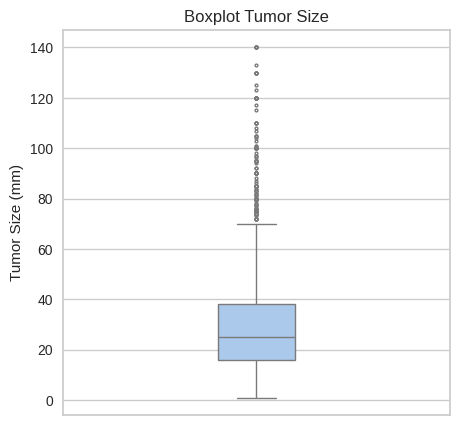

In [23]:
# Boxplot SNS Tamaños tumorales

plt.figure(figsize=(5,5))
sns.boxplot(df, y="Tumor Size", palette="pastel", width=0.2, fliersize=2).set(title="Boxplot Tumor Size", ylabel="Tumor Size (mm)")

plt.show()

In [24]:
# Obtengo el resto de los estadisticos de la funcion describe y de mi boxplot

q1 = df["Tumor Size"].quantile(0.25).round(1)
q2 = df["Tumor Size"].quantile(0.50).round(1)
q3 = df["Tumor Size"].quantile(0.75).round(1)
maximo = df["Tumor Size"].max()
minimo = df["Tumor Size"].min()

print("q1:", q1 ,"| q2:", q2 ,"| q3:", q3, "| maximo:", maximo, "| minimo:", minimo)

# Obtener los valores de outliers superiores e inferiores)

valor_max_ts = df["Tumor Size"].quantile(0.75) + 1.5*(df["Tumor Size"].quantile(0.75)-df["Tumor Size"].quantile(0.25))
valor_min_ts = df["Tumor Size"].quantile(0.25) - 1.5*(df["Tumor Size"].quantile(0.75)-df["Tumor Size"].quantile(0.25))

print("outlier superior:", valor_max_ts, "| outlier inferior:", valor_min_ts)


q1: 16.0 | q2: 25.0 | q3: 38.0 | maximo: 140 | minimo: 1
outlier superior: 71.0 | outlier inferior: -17.0


Aqui el outlier menor de negativo (-17).  Sabiendo que las medidas de tumores no pueden ser negativas,
 considero que estos valores que marcan el limite inferior y superior a partir de los cuales se consideran
  ouliers no son utiles para mi analisis


<bound method Figure.tight_layout of <Figure size 1000x1500 with 8 Axes>>

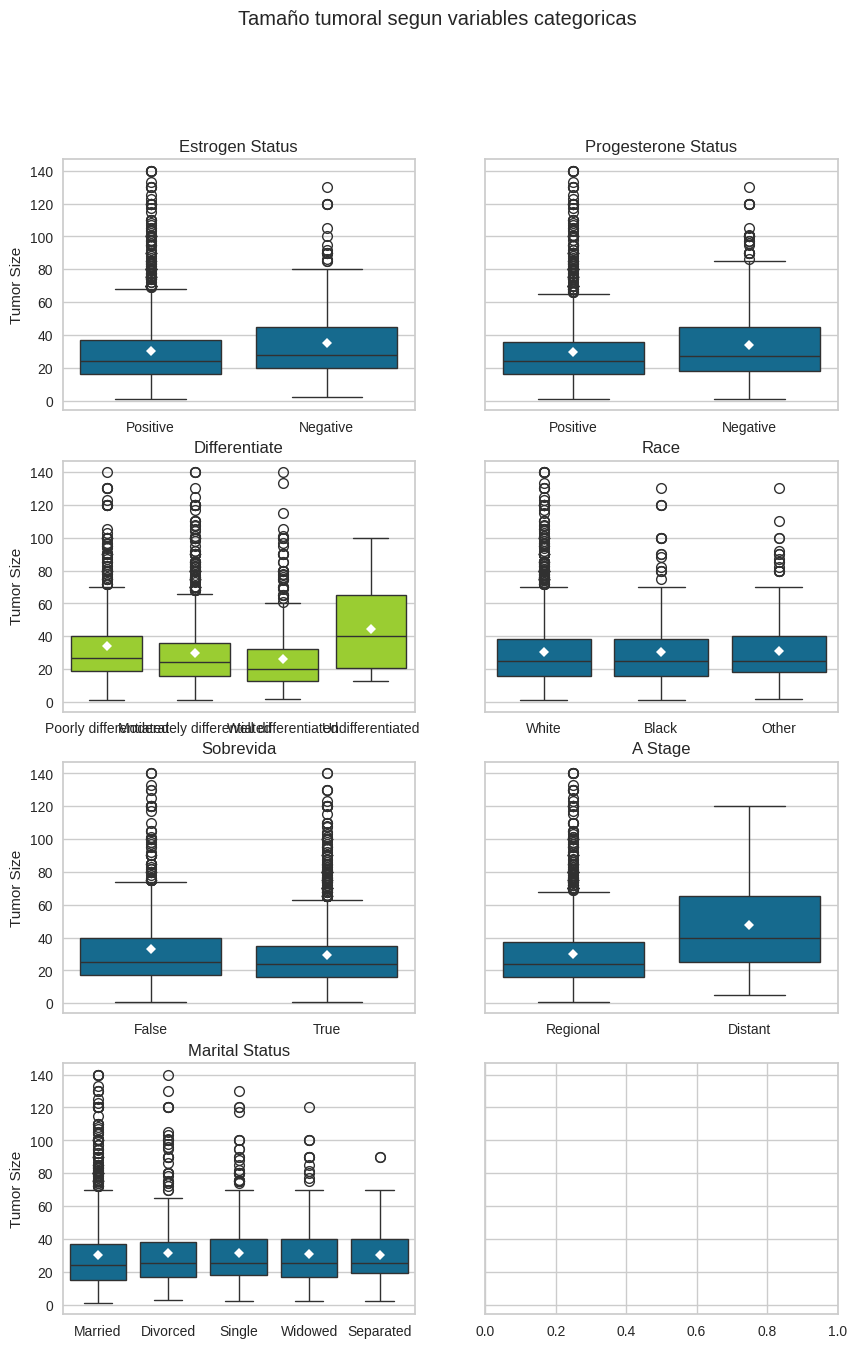

In [28]:
# Boxplots seaborn Tumor Size por categorias

fig, axs = plt.subplots(4,2, figsize=(10,15), sharey=True)
es = sns.boxplot(df, y="Tumor Size", x="Estrogen Status", ax=axs[0,0],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Estrogen Status", xlabel=None)
ps = sns.boxplot(df, y="Tumor Size", x="Progesterone Status", ax=axs[0,1],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Progesterone Status", xlabel=None)
d = sns.boxplot(df, y="Tumor Size", x="Differentiate",  ax=axs[1,0],showmeans=True,
                boxprops={"facecolor":"yellowgreen"},
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Differentiate", xlabel=None)
#d.set_xticklabels(df['Differentiate'].unique(), fontsize=8 )
r = sns.boxplot(df, y="Tumor Size", x="Race",  ax=axs[1,1],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Race", xlabel=None)
sv =sns.boxplot(df, y="Tumor Size", x="Sobrevida", ax=axs[2,0],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Sobrevida", xlabel=None)
As =sns.boxplot(df, y="Tumor Size", x="A Stage", ax=axs[2,1],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="A Stage", xlabel=None)
ms =sns.boxplot(df, y="Tumor Size", x="Marital Status", ax=axs[3,0],showmeans=True,
           meanprops={"marker": "D",
                      "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Marital Status", xlabel=None)
fig.suptitle("Tamaño tumoral segun variables categoricas")
fig.tight_layout

# no pude cambiar el tamaño de los labelticks y se me superponen los textos

 De cada sub grafico anterior se puede ver como el tamaño tumoral se comporta con respecto a cada categoria:

<br>

- Estrogen y Progesterone Status: en ambos se ve una media un poquito mayor en los negativos y estos tiene menos outliers que los positivos

<br>

- Differentiate: se ve una media del tamaño tumoral más grande en aquellos grados de diferenciacion más desfavorables, y más pequeños en los menos desfavorables. Tambien se observa que los menos favorables (Undifferentiated) no se les marcan outliers.

<br>

- Race: no parece haber diferencia en la media. Se puede ver que hay mas registros de raza blanca. ¿Acaso un sesgo de eleccion de pacientes?

<br>

- Sobrevida: parece haber mayores tamaños tumorales en aquellos con "Sobrevida" False: que no vivieron mas de 60 meses tras su diagnostico.

<br>

- A Stage: se ven tamaños tumorales mayores para los registros con A Stage Distant (paciente con enfermedad a distancia) y menores para A Stage Regional.

<br>

- Marital Status: no parece haber diferencias en la media del tamaño de tumor segun estado civil.


## Nodulo Regionales Examinados y Positivos

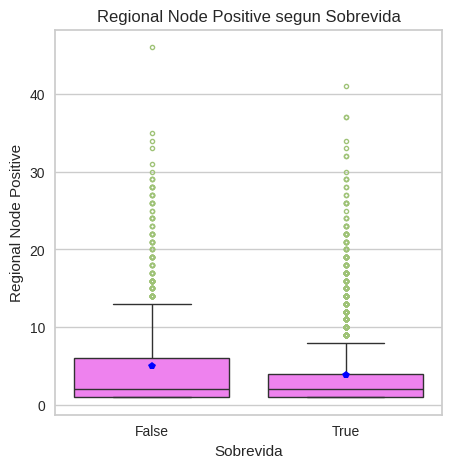

In [29]:
# Boxplot comparando Regional Node Positive segun Sobrevida
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=df, y="Regional Node Positive", x="Sobrevida",
           patch_artist=True,
           showmeans=True, #triangulito verde la media muestral de cada categoria
           meanprops = dict(marker='p', markeredgecolor='blue',markerfacecolor='blue'),
                      flierprops=dict(marker='o',
                           markersize=3,
                           linestyle='',
                           markeredgecolor='g'),
           boxprops = dict(facecolor="violet")).set_title('Regional Node Positive segun Sobrevida')

plt.show()

#df[(df["Status"]=="Alive")].decribe(include=object)

En este boxplot de RNP segun Sobrevida, pareciera que los pacientes con Sobrevida False (meses de supervivencia menores a 60) tuvieron más ganglios regionales positivos que los que sobrevivieron mas de 5 meses.


Text(0, 0.5, 'Nodulos Regionales Positivos')

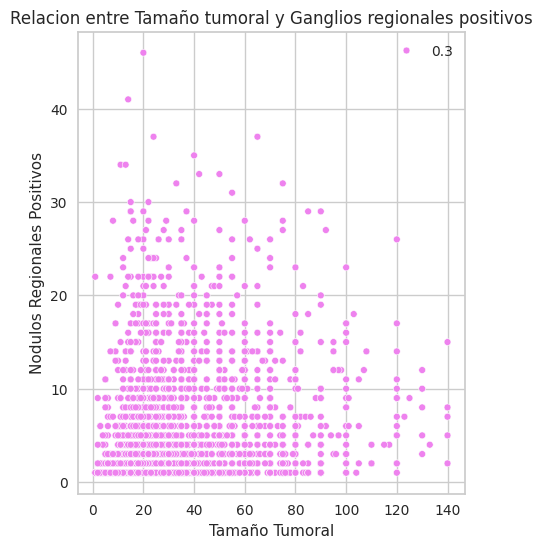

In [30]:
# Scatterplot con sns de Nodulos regionales positivos y tamaño tumoral

sns.set_style('whitegrid')
plt.figure(figsize=(5,6))
sns.scatterplot(x=df["Tumor Size"], y=df["Regional Node Positive"], marker='o', color="violet", size=0.3)
plt.title('Relacion entre Tamaño tumoral y Ganglios regionales positivos')
plt.xlabel('Tamaño Tumoral')
plt.ylabel('Nodulos Regionales Positivos')

De este scatterplot de RNP segun Tumor Size no saco muchas conclusiones ya que: primero veo la condensacion de casos con tamaños tumorales de entre  20 y 40mm, y luego casos con altos RNP en tamaños tumorales grandes y pequeños.

[Text(0.5, 1.0, 'Relacion: RNP, Survival Months y A Stage'),
 Text(0, 0.5, 'Regional Node Positive'),
 Text(0.5, 0, 'Survival Months')]

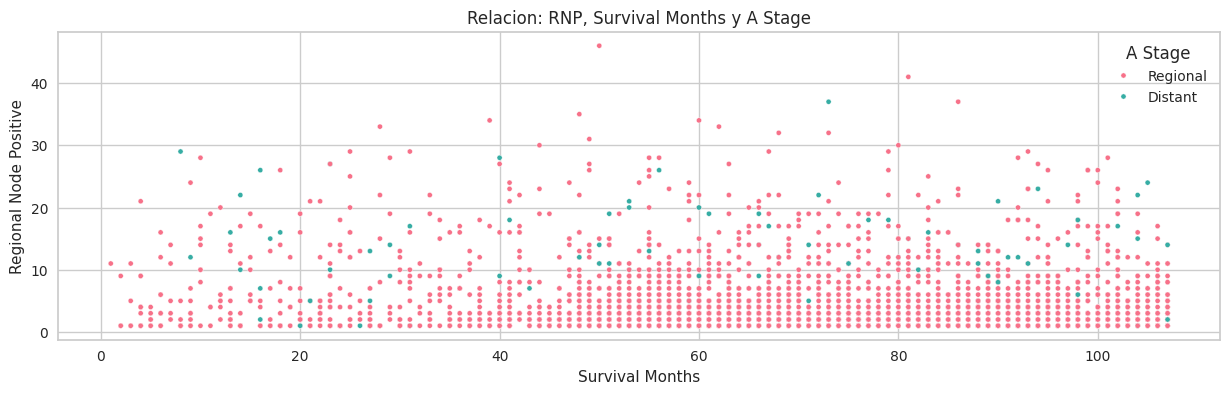

In [31]:
# Scatterplot de RNP y meses de supervivencia identificando los estadios de diseminacion: A Status
plt.subplots(figsize=(15, 4))
sns.scatterplot(data=df,
                x="Survival Months",
                y="Regional Node Positive",
                hue="A Stage",
                palette="husl",
                s=14, alpha=1).set(title="Relacion: RNP, Survival Months y A Stage",
                                     ylabel="Regional Node Positive",
                                     xlabel="Survival Months",
                                     )


En este grafico  se ve, antes que nada, mayor densidad de observaciones con supervivencia mayor a 44 meses aproximademnte. Lo cual podria ser un sesgo el la eleccion de participantes de la base.
Ademas se puede ver como hay registros de A Stage Distant repartidos por todos los survival months pero quezas con mayor proporcion en los de menores survival months.

## 6th Stage

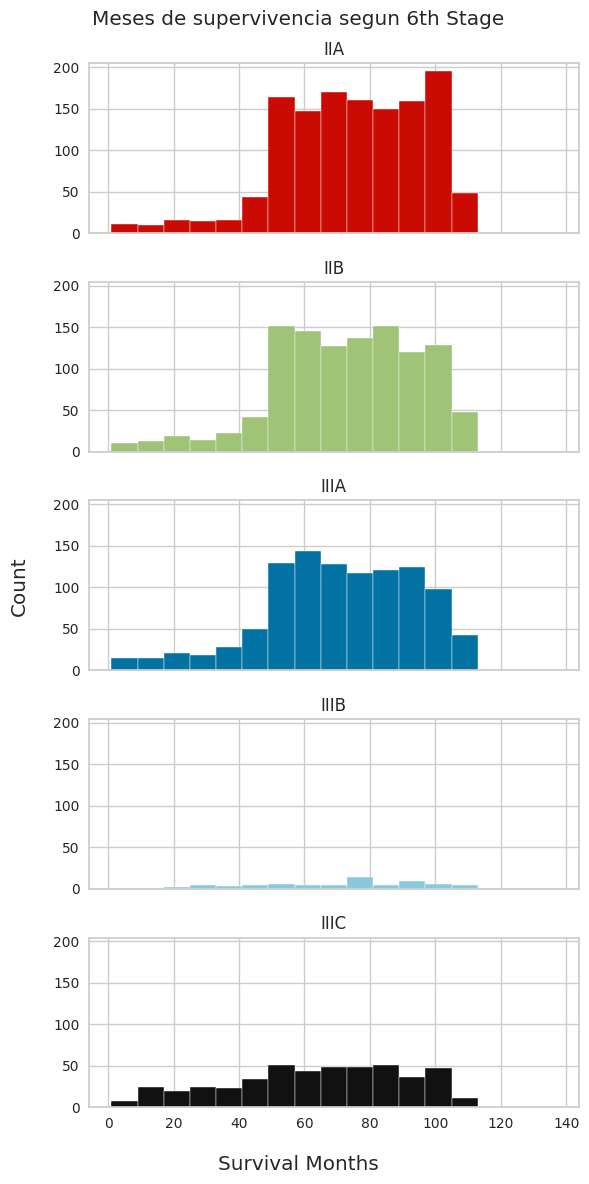

In [32]:
# SUBPLOTS HISTOGRAMAS de Survival Months segun 6th Stage
bin_width = 8
bin_range = range(1, 140, bin_width)
fig, axs = plt.subplots (nrows=5, figsize=(6, 12), sharex=True, sharey=True )

axs[0].hist(df[df["6th Stage"]=="IIA"]["Survival Months"], color="r", bins=bin_range)
axs[0].set_title("IIA")

axs[1].hist(df[df["6th Stage"]=="IIB"]["Survival Months"], color="g", bins=bin_range)
axs[1].set_title("IIB")

axs[2].hist(df[df["6th Stage"]=="IIIA"]["Survival Months"], color="b", bins=bin_range)
axs[2].set_title("IIIA")

axs[3].hist(df[df["6th Stage"]=="IIIB"]["Survival Months"], color="c", bins=bin_range)
axs[3].set_title("IIIB")

axs[4].hist(df[df["6th Stage"]=="IIIC"]["Survival Months"], color="k", bins=bin_range)
axs[4].set_title("IIIC")

fig.suptitle("Meses de supervivencia segun 6th Stage")
fig.supxlabel("Survival Months")
fig.supylabel("Count")
fig.tight_layout()

plt.show()


En este grupo de histogramsas vemos la cantidad de casos de cada categoria de 6th stage y como se distribuyen segun los meses de sobrevida. <br>
Lo veremos mas claro en el siguiente grafico, todas las categorias en uno mismo viendo la densidad que contribuye cada una al total de los casos.

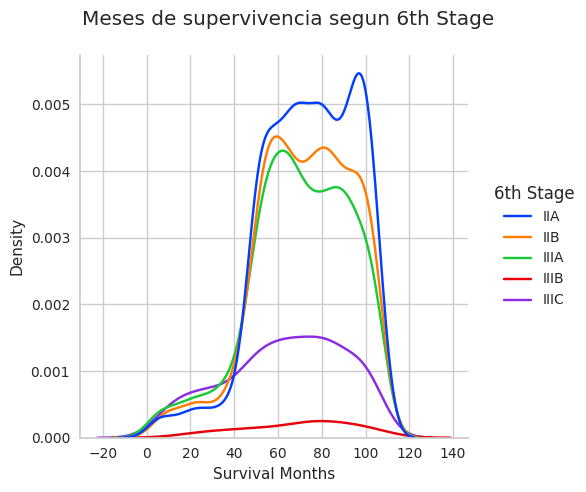

In [33]:
# DISPLOT KDE curva de densidad , Meses de supervivencia segun 6th Stage
hue_order = ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']
figura2 = sns.displot(data=df, kind="kde", x="Survival Months",  hue="6th Stage", hue_order=hue_order, palette="bright")
figura2.fig.suptitle("Meses de supervivencia segun 6th Stage")
figura2.tight_layout()
plt.show()

## Estrogen and Progesterone Status

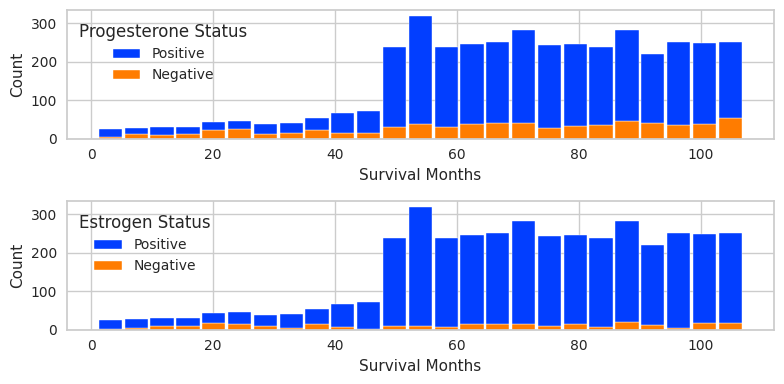

In [34]:
f, axs = plt.subplots(2,1, figsize=(8,4))
sns.histplot(data=df, x="Survival Months", hue="Estrogen Status", multiple="stack", shrink=.9, alpha=1, legend=True, palette="bright", ax=axs[1])
sns.histplot(data=df, x="Survival Months", hue="Progesterone Status", multiple="stack", shrink=.9, alpha=1, legend=True,palette="bright", ax=axs[0])
f.tight_layout()
plt.show()

En estos dos graficos de los receptores hormonales segun los meses de dupervivencia pareciera que la cantidad neta de negativos se manteiene constante en todos los meses de sobrevida. Dicho con otras palabras y acentruando un posible sesgo que vimos en un grafico anterior, a pesar de que a partir de los 44 meses de supervivencia hay mas casos registrados, la cantid de negativos es constante y el incremento de casos pareciera ser plenamente de casos con receptores hormonales positivos, tanto para Estrogenos como Progestagenos.

# 🧠 🤖 Machine Learning


A partir de la base selecionada, se intentará crear un modelo de machine learning supervisado para resolver el problema de clasificación: sobrevivirá la paciente al menos 5 años post diagnostico? <br>
Se utilizaran las heramientas aprendidas en el curso para analizar de multiples angulos y posibilidades dicho problema a fin de encontrar la que mejor se aplique.

## Matriz de correlacion de df con todas las variables

In [35]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Differentiate', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status', 'Sobrevida',
       'RNP/RNE'],
      dtype='object')

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

cols = ['Race', 'Marital Status',
         'T Stage',
        'N Stage', 'A Stage',
        '6th Stage', 'Differentiate',
        'Estrogen Status','Progesterone Status',
         'Sobrevida', 'Status']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)


In [37]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Differentiate', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status', 'Sobrevida',
       'RNP/RNE'],
      dtype='object')

Text(0.5, 1.0, 'Coeficientes de correlacion de df')

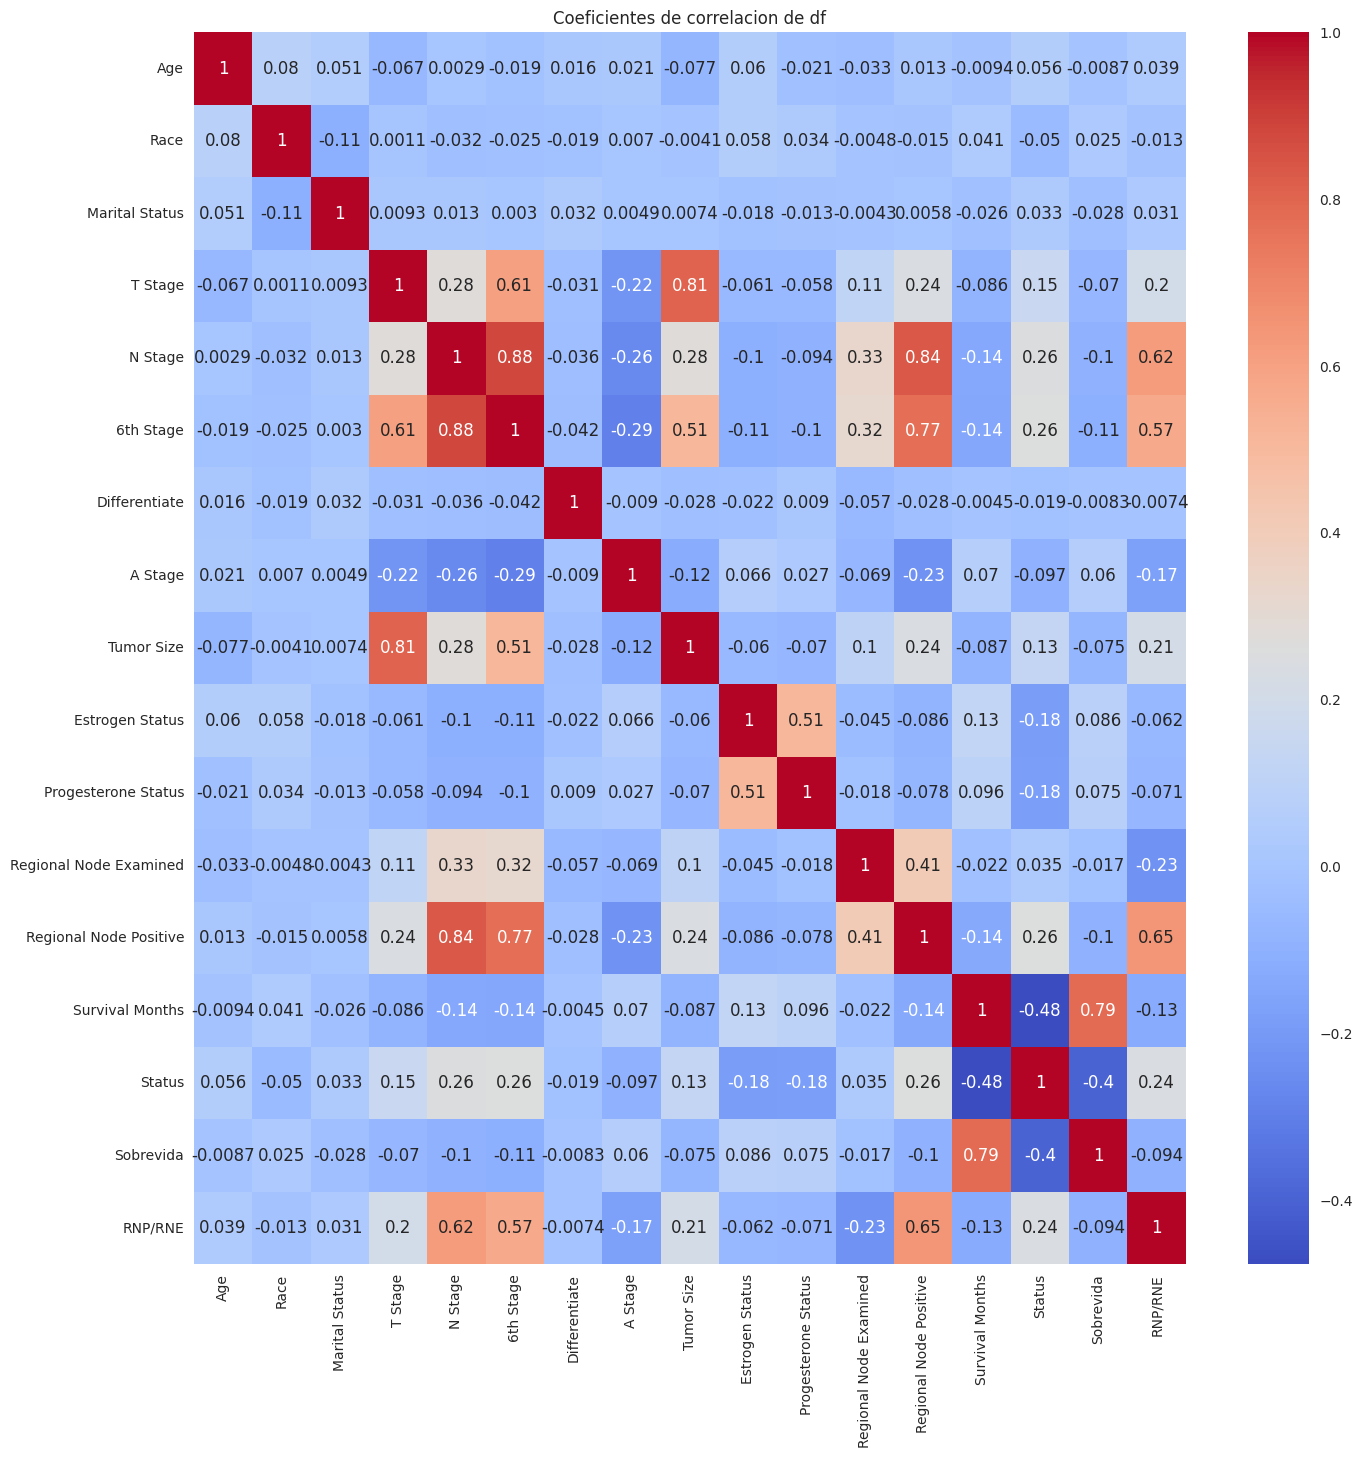

In [38]:
# Graficos HEATMAP de correlacion con SNS

# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Crear una visualización de la matriz de correlación utilizando seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm').set_title("Coeficientes de correlacion de df")


Segun esta matriz vemos que hay relaciones de interés y más estechas en grupos de variables como:
- Tumor Size, T Stage, RNP, RNE, RNP/RNE, N Stage y 6th Stage (Sabemos que T Stage depende bastante de Tumor Size y que que 6th Stage se compone de T y N Stage)
- RNE, RNP y RNE/RNP porque hicimos la ultima medida en funcion de las dos primeras
- Sobrevida y Survival Months: sera ignorada ya que creamos la Sobrevida segun los Survival Months.

Las que mayor rendimiento dan (>0.7)
- T Stage y Tumor Size
- N Stage y 6th Stage
- N Stage y RNP
- 6th Stage y RNP


# Normalizacion de datos base: "dfn"

A partir de aqui voy a trabajar con **dfn** como copia de df, a la cual voy a normalizarle los datos

In [39]:

dfn = df

# Normalizacion de variables categoricas binarias con GetDummies
<br>
Sobrevida<br>
Status<br>
A Stage<br>
Estrogen Status<br>
Pregesterone Status<br>

In [40]:
"""  GET DUMMIES hace para cada variable binaria un df con 2 columnas: una para cada una de las dos categorias de la variable, y se completa con true o false para cada registro.
Luego elimino una de las dos y le cambio el nombre a la variable para tener 1 solo dato que si es true significa la variable nombrada.

Algunos features necesitaron ser tratados de manera distinta para obtener lo que finalmente se transforma a array con True 1 y False 0 ints"""


# Sobrevida
sv = pd.get_dummies(dfn['Sobrevida']) # False - True > sobre5anios
sv.rename(columns={0:"menos5anios", 1:"sobre5anios"}, inplace=True)
sv.drop("menos5anios", axis=1, inplace=True)
sv = sv["sobre5anios"].values.astype(int) # reemplazar valores boobleanos por 1 True y 0 False, y  queda array

# Status
st = pd.get_dummies(dfn['Status']) # Alive - Dead  > Alive
st.rename(columns={0:"Alive", 1:"Dead"}, inplace=True)
st.drop("Dead", axis=1, inplace=True)
st = st['Alive'].values.astype(int) # reemplazar valores boobleanos por 1 True y 0 False, y  queda array

# A Stage
ast = pd.get_dummies(dfn['A Stage']) # Distant - Regional  > Distant mts
ast.rename(columns={0:"Distant", 1:"Regional"}, inplace=True)
ast.drop("Regional", axis=1, inplace=True)
ast.rename(columns={'Distant':"Distant mts"}, inplace=True)
ast = ast['Distant mts'].values.astype(int)

# Estrogen Status
es = pd.get_dummies(dfn['Estrogen Status']) # Negative - Positive  > Estrogen receptors
es.rename(columns={0:"Negative", 1:"Positive"}, inplace=True)
es.drop("Negative", axis=1, inplace=True)
es.rename(columns={'Positive':"ER positive"}, inplace=True)
es = es['ER positive'].values.astype(int)

# Progesterone Status
ps = pd.get_dummies(dfn['Progesterone Status']) # Negative - Positive > Progesterone receptors
ps.rename(columns={0:"Negative", 1:"Positive"}, inplace=True)
ps.drop("Negative", axis=1, inplace=True)
ps.rename(columns={'Positive':"PR positive"}, inplace=True)
ps = ps['PR positive'].values.astype(int)



In [41]:
# reeemplazo las columnas creadas con getdummies en el dfn

dfn['Sobrevida'] = sv
dfn['Status'] = st
dfn['A Stage'] = ast
dfn['Estrogen Status'] = es
dfn['Progesterone Status'] = ps

dfn

Age  Race  Marital Status  T Stage  N Stage  6th Stage  Differentiate  \
0      68     2               1        0        0          0              1   
1      50     2               1        1        1          2              0   
2      58     2               0        2        2          4              0   
3      58     2               1        0        0          0              1   
4      47     2               1        1        0          1              1   
...   ...   ...             ...      ...      ...        ...            ...   
4019   62     1               1        0        0          0              0   
4020   56     2               0        1        1          2              0   
4021   68     2               1        1        0          1              0   
4022   58     0               0        1        0          1              0   
4023   46     2               1        1        0          1              0   

      A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0           0           4                1                    1   
1           0          35                1                    1   
2           0          63                1                    1   
3           0          18                1                    1   
4           0          41                1                    1   
...       ...         ...              ...                  ...   
4019        0           9                1                    1   
4020        0          46                1                    1   
4021        0          22                1                    0   
4022        0          44                1                    1   
4023        0          30                1                    1   

      Regional Node Examined  Regional Node Positive  Survival Months  Status  \
0                         24                       1               60       1   
1                         14                       5               62       1   
2                         14                       7               75       1   
3                          2                       1               84       1   
4                          3                       1               50       1   
...                      ...                     ...              ...     ...   
4019                       1                       1               49       1   
4020                      14                       8               69       1   
4021                      11                       3               69       1   
4022                      11                       1               72       1   
4023                       7                       2              100       1   

      Sobrevida   RNP/RNE  
0             1  0.041667  
1             1  0.357143  
2             1  0.500000  
3             1  0.500000  
4             0  0.333333  
...         ...       ...  
4019          0  1.000000  
4020          1  0.571429  
4021          1  0.272727  
4022          1  0.090909  
4023          1  0.285714  

[4024 rows x 17 columns]

# Modelo Regresion logistica para binarios

In [42]:
# Armo 3 dataframes con dos variables cuantitativas Xs que usare en modelos de clasificacion de Target Features Binarias.
xTS_SM = dfn[['Tumor Size', 'Survival Months']] # con Estrogen y Progesterone Status y A Stage
xTS_RNP = dfn[['Tumor Size', 'Regional Node Positive']] # con Sobrevida
xRNP_SM = dfn[['Regional Node Positive', 'Survival Months']] # con A stage

xRNPE_SM = dfn[['RNP/RNE', 'Survival Months']] # con A Stage


In [43]:
# Paso 1
# Importar las librerias del modelo
from sklearn.linear_model import LogisticRegression

# Paso 2
# Crear la instancia del modelo en este caso clasificacion por regresion logistica
clf = LogisticRegression()



### Tumor Size - Survival Months- Estrogen Status

In [44]:
# Paso 3
# Entrenar el modelo con los datos y la etiqueta
clf.fit(xTS_SM, es)  # X son las features, "es" el target feature Y

X2 = xTS_SM.values
y2=es

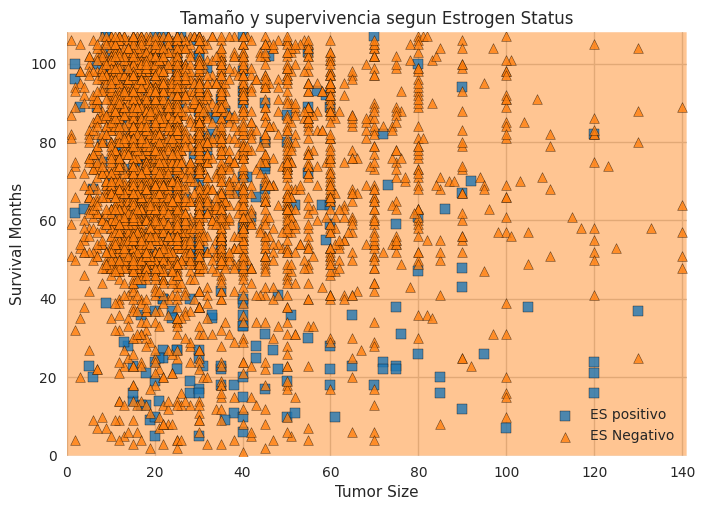

In [45]:
ax = plot_decision_regions(X2, y2, clf=clf) #

plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.title('Tamaño y supervivencia segun Estrogen Status')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['ES positivo', 'ES Negativo'],
           framealpha=0.3, scatterpoints=1)
plt.show()

### Tumor Size - Survival Months-  Progesterone Status

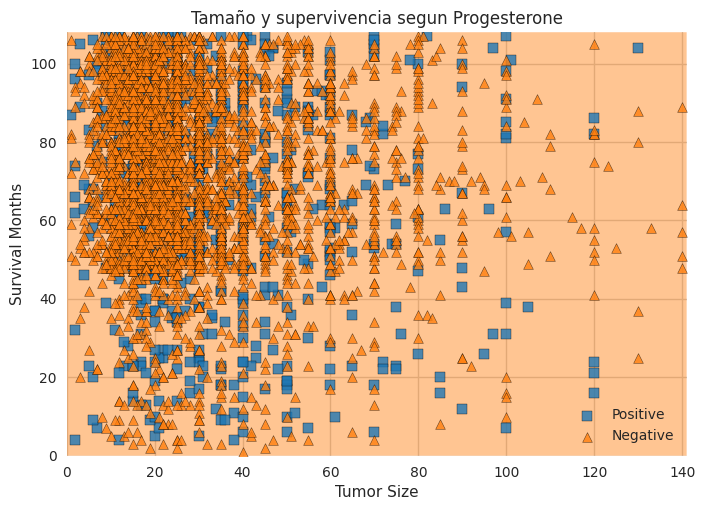

In [46]:
# Paso 3
# Entrenar el modelo con los datos y la etiqueta
clf.fit(xTS_SM, ps)
X2 = xTS_SM.values
y2=ps

ax = plot_decision_regions(X2, y2, clf=clf)

plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.title('Tamaño y supervivencia segun Progesterone')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['Positive', 'Negative'],
           framealpha=0.3, scatterpoints=1)
plt.show()

Para ninguno de los marcadores hormonales parece haber una clara agrupacion de registros segun las variables seleccionadas. Sean marcadores positivos o negativos parecen distribuirse homogenamente en las variablaes de tamalo tumoral y meses de supervivencia.

## Tumor Size - Survival Months- A Stage

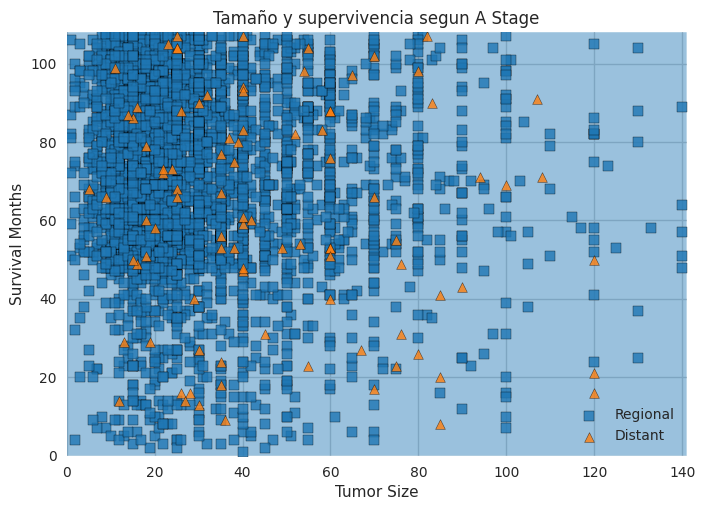

In [47]:
# Paso 3
# Entrenar el modelo con los datos y la etiqueta
clf.fit(xTS_SM, ast)
X2 = xTS_SM.values
y2=ast

ax = plot_decision_regions(X2, y2, clf=clf)

plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.title('Tamaño y supervivencia segun A Stage')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['Regional','Distant'],
           framealpha=0.3, scatterpoints=1)
plt.show()

Tampoco se distingue agrupacion de estadio de diseminacion A Stage segun meses de supervivencia y tamaño tumoral.

## Regional Node Positive - Survival Months - A Stage

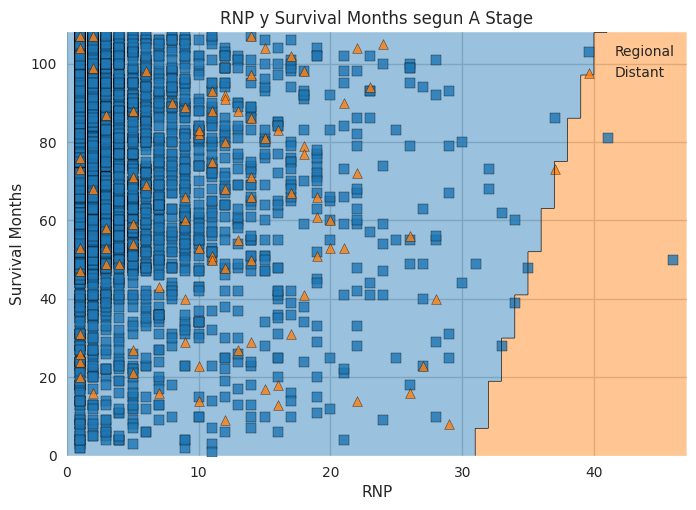

In [48]:
 # Entrenar el modelo con los datos y la etiqueta

clf.fit(xRNP_SM, ast)
X2 = xRNP_SM.values
y2=ast

ax = plot_decision_regions(X2, y2, clf=clf) #

plt.xlabel('RNP')
plt.ylabel('Survival Months')
plt.title('RNP y Survival Months segun A Stage')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['Regional','Distant'],
           framealpha=0.3, scatterpoints=1)
plt.show()

En este plot se marcan dos zonas, pero los punts en la zona roja (Distant) son azules (regional). Dificilmente interpretable.

## RNP/RNE - Survival Months - A Stage

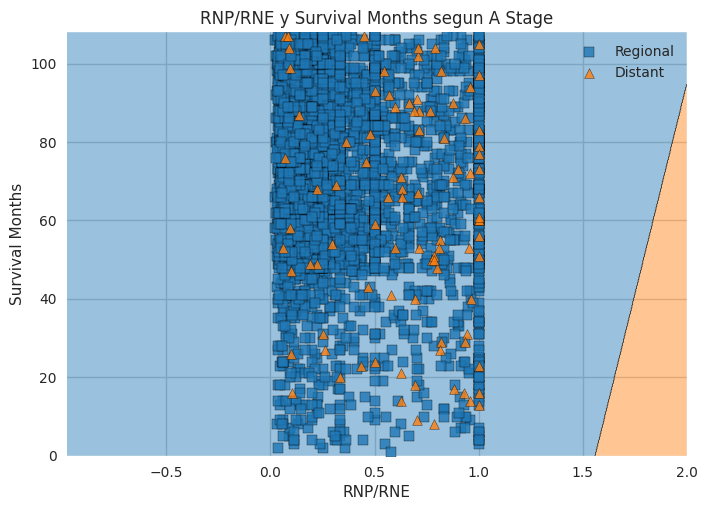

In [49]:
# Entrenar el modelo con los datos y la etiqueta

clf.fit(xRNPE_SM, ast)
X2 = xRNPE_SM.values
y2=ast

ax = plot_decision_regions(X2, y2, clf=clf) #

plt.xlabel('RNP/RNE')
plt.ylabel('Survival Months')
plt.title('RNP/RNE y Survival Months segun A Stage')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['Regional','Distant'],
           framealpha=0.3, scatterpoints=1)
plt.show()

En este modelo, se ve como la distribucion de RNP/RNE va de 0 a 1, distorcionando el modelo. A pesar de que no se ve una clara agrupacion de los registros segun su estado de diseminacion: hay registros de A Stage Distant distribuidos por todos los valores de RNP/RNE y Survival Months, pareciera que tiende a agrupar algunos A Stage Distant, a menores Survival Months, lo cual seria logico en terminos clinicos.

Concluyo que el modelo de Regresion logistica no me aporta clasificaciones de utilidad segun mis variables cuantitativas con respecto a las binarias seleccionadas.

# Normalizacion de variable multicategoricas
T Stage <br>
N Stage <br>
6th Stage <br>
Differentiate <br>
Marital Status <br>
Race <br>


In [51]:
# Normalizacion manual para poder ordenar mis valores ordinales

print("6th Stage", dfn["6th Stage"].unique())
print("Differentiate", dfn["Differentiate"].unique())

##
print("T Stage", dfn["T Stage"].unique()) # estaban bien ordenados
print("N Stage", dfn["N Stage"].unique())

# Categoricos ORDINALES:
ts = dfn['T Stage'].replace({'T1':0, 'T2':1, 'T3':2, 'T4':3})
#ts = ts.values.astype(int)

ns = dfn['N Stage'].replace({'N1':0, 'N2':1, 'N3':2})
#ns = ns.values.astype(int)

sixs = dfn['6th Stage'].replace({'IIA':0, 'IIB':1, 'IIC':2, 'IIIA':3, 'IIIB':4, 'IIIC':5})
#sixs = sixs.values.astype(int)

di = dfn['Differentiate'].replace({'Well differentiated':0, 'Moderately differentiated':1, 'Poorly differentiated':2, 'Undifferentiated':3})
#di = di.values.astype(int)

#---------------
# Categoricos NOMINALES

mst = dfn['Marital Status'].replace({'Married':0, 'Widowed':1, 'Separated':2, 'Divorced':3, 'Single':4})
#mst = mst.values.astype(int)

race = dfn['Race'].replace({'White':0, 'Black':1, 'Other':2})
#race = race.values.astype(int)



6th Stage [0 2 4 1 3]
Differentiate [1 0 3 2]
T Stage [0 1 2 3]
N Stage [0 1 2]


In [52]:
dfn['T Stage'] = dfn['T Stage'].values.astype(int)

dfn['N Stage'] = dfn['N Stage'].values.astype(int)

dfn['6th Stage'] = dfn['6th Stage'].values.astype(int)

dfn['Differentiate']= dfn['Differentiate'].values.astype(int)

dfn['Marital Status']= dfn['Marital Status'].values.astype(int)

dfn['Race']= dfn['Race'].values.astype(int)


In [ ]:
# Normalizacion con Lable Encoder: pero como no estoy segura despues de que orden le asigno y no encontre como hacemre la tabla con la codificacion seigo usando el manual
"""
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

cols = ['Race', 'Marital Status', 'Differentiate', 'Grade', '6th Stage', 'N Stage', 'T Stage']

dfn[cols] = dfn[cols].apply(LabelEncoder().fit_transform)
dfn.columns
"""
# COMO ME ASEGURO DE QUE ESTEN ENCODEADOS EN EL ORDEN CORRECTO?

"\nfrom sklearn import preprocessing\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoder = preprocessing.LabelEncoder()\n\ncols = ['Race', 'Marital Status', 'Differentiate', 'Grade', '6th Stage', 'N Stage', 'T Stage']\n\ndfn[cols] = dfn[cols].apply(LabelEncoder().fit_transform)\ndfn.columns\n"

In [53]:
Age = dfn['Age']
Race = dfn['Race']
Marital_Status = dfn['Marital Status']
T_Stage = dfn['T Stage']
N_Stage = dfn['N Stage']
Sixth_Stage = dfn['6th Stage']
Differentiate = dfn['Differentiate']
A_Stage = dfn['A Stage']
Tumor_Size = dfn['Tumor Size']
Estrogen_Status = dfn['Estrogen Status']
Progesterone_Status = dfn['Progesterone Status']
Regional_Node_Examined = dfn['Regional Node Examined'],
Positive = dfn['Regional Node Positive']
Survival_Months = dfn['Survival Months']
Status = dfn['Status']
Sobevida = dfn['Sobrevida'],

# K Nearest Neighbour

Este modelo de ML Supervisado se usa para problemas de clasificacion a partir de variables numericoas

In [54]:
# Importar las librerias del modelo

from sklearn.neighbors import KNeighborsClassifier
# permite graficar 3 dimensiones

### Tumor Size - Survival Months- Differentiate

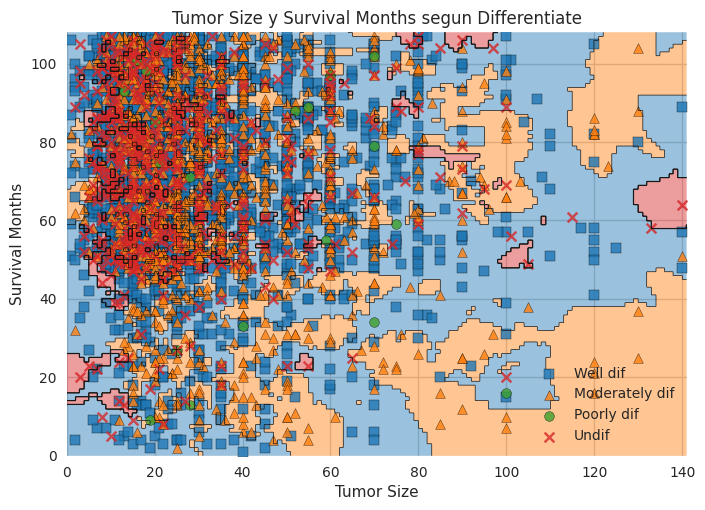

In [55]:
# Crear la instancia del modelo KNN con 3 vecinos

clf = KNeighborsClassifier(n_neighbors = 3)

# Entrenar el modelo con los datos y la etiqueta
clf.fit(xTS_SM, Differentiate)

X2= xTS_SM.values
y2= Differentiate.values

ax=plot_decision_regions (X2, y2, clf=clf)

plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.title('Tumor Size y Survival Months segun Differentiate')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['Well dif', 'Moderately dif', 'Poorly dif', 'Undif'],
           framealpha=0.3, scatterpoints=1)
plt.show()

Horrible, no se armaron buenos grupos de Differnetiate segun Tumor Size y Survival Months con el modelo de K Nearest Neighbour de 3 vecinos

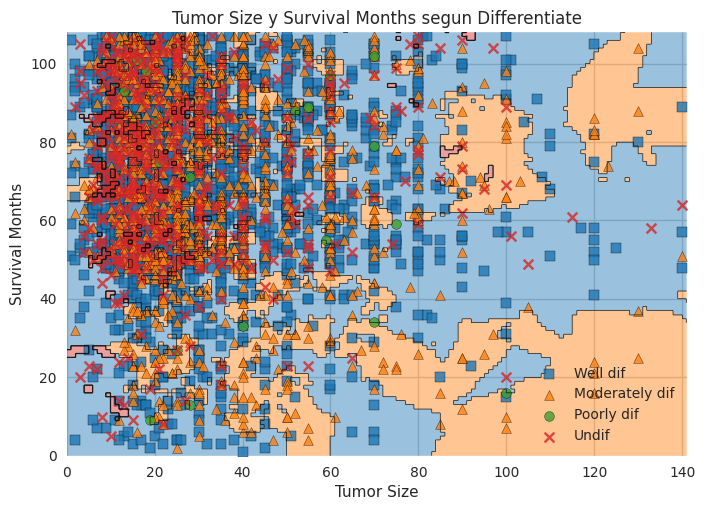

In [56]:
# Crear la instancia del modelo   con 6 vecinos

clf = KNeighborsClassifier(n_neighbors = 6)

# Entrenar el modelo con los datos y la etiqueta
clf.fit(xTS_SM, Differentiate)

X2= xTS_SM.values
y2= Differentiate.values

ax=plot_decision_regions (X2, y2, clf=clf)

plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.title('Tumor Size y Survival Months segun Differentiate')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['Well dif', 'Moderately dif', 'Poorly dif', 'Undif'],
           framealpha=0.3, scatterpoints=1)
plt.show()

Con más vecinos a considerear para los mismos x tampoco se distinguen grupos de grado de diferenciacion tumoral claros.

### ⚓ Tumor Size - Survival Months- T Stage :

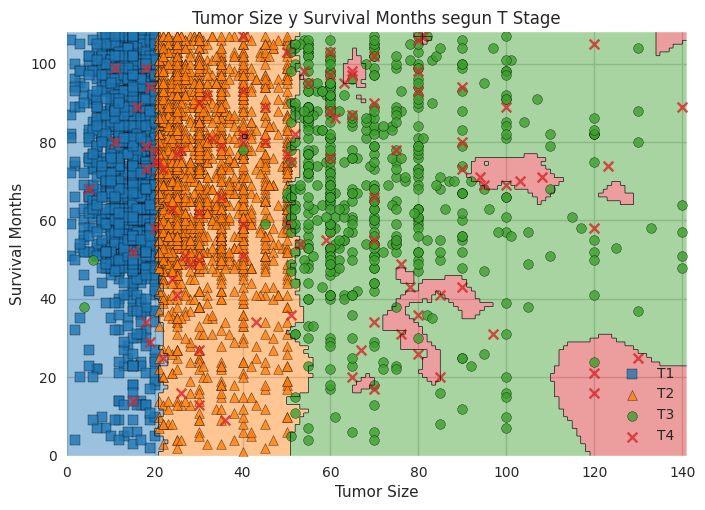

In [57]:
# Crear la instancia del modelo con 3 vecinos

clf = KNeighborsClassifier(n_neighbors = 3)

# Entrenar el modelo con los datos y la etiqueta
clf.fit(xTS_SM, T_Stage)

X2= xTS_SM.values
y2= T_Stage.values

ax=plot_decision_regions (X2, y2, clf=clf) #

plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.title('Tumor Size y Survival Months segun T Stage')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['T1', 'T2', 'T3', 'T4'],
           framealpha=0.3, scatterpoints=1)
plt.show()

Finalmente en este modelo, aunque con sesgo de eleccion de variables que se corresponden: T Stage se compone principalemnte de Tumor Size por definicion, se puede ver una mejor clasificacion de los datos en las 4 categorias de T Stage segun el tamaño tumoral. Sin embargo, no pareciera haber relacion entre los survival months y la clasificacion de T Stage ya que se ven lagunas de T4 en todo el rango de meses de sobrevida.

# Arbol de decision
Este modelo de ML supervisado se usa para problemas de clasificacion de variables numericas

### Tumor Size - Survival Months- T Stage

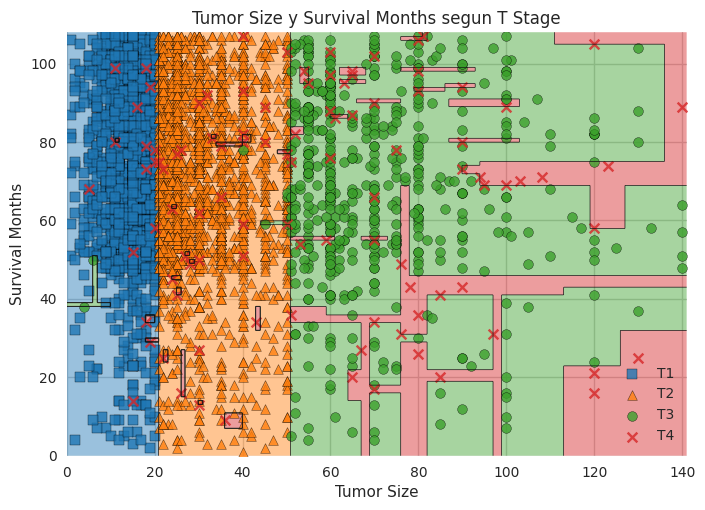

In [59]:
# Importar las librerias del modelo

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree


clf = DecisionTreeClassifier()
clf.fit(xTS_SM, T_Stage)  # Entrenar el modelo con los datos y la etiqueta

X2= xTS_SM.values
y2= T_Stage.values

ax=plot_decision_regions(X2, y2, clf=clf)

plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.title('Tumor Size y Survival Months segun T Stage')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['T1', 'T2', 'T3', 'T4'],
           framealpha=0.3, scatterpoints=1)
plt.show()

### Tumor Size - Survival Months- T Stage sin T4

In [66]:
# hago mis Y de T Stage solo T1 T2 T3, como estaba normalizado 0, 1, 2, 3, Filtro el dfn123 que no tenga el 3(T4)
print(dfn["T Stage"].unique()) # 0 1 2 3

dfn123 = dfn

ts123 = dfn123[dfn123['T Stage']!=3]['T Stage'].replace({'T1':0, 'T2':1, 'T3':2})
print(ts123.unique())
#ts123 = ts123.values.astype(int) # con esto prendido no anda
dfn123['T Stage sin T4'] = ts123

# hago mis X dentro del dfn filtrado (dfn123)
xTS_SM123 = dfn123[dfn123['T Stage']!=3][['Tumor Size', 'Survival Months']]

[0 1 2 3]
[0 1 2]


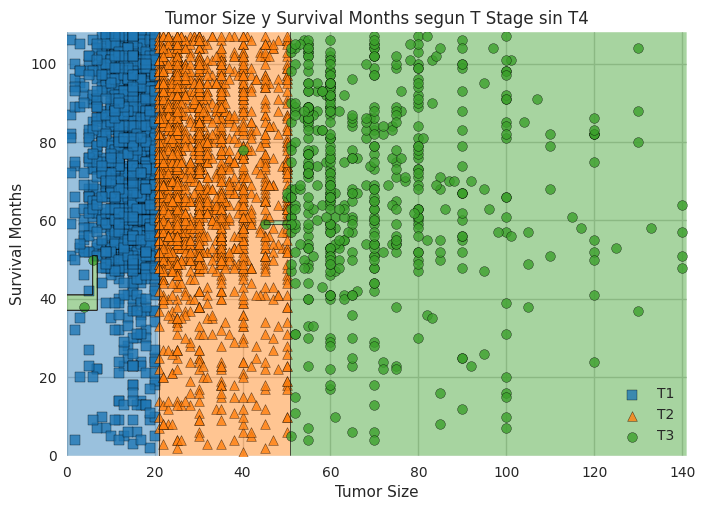

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

clf = DecisionTreeClassifier()

# Entrenar el modelo con los datos y la etiqueta
clf.fit(xTS_SM123, ts123)

X2= xTS_SM123.values
y2= ts123.values

ax=plot_decision_regions(X2, y2, clf=clf)

plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.title('Tumor Size y Survival Months segun T Stage sin T4')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['T1', 'T2', 'T3'],
           framealpha=0.3, scatterpoints=1)
plt.show()

Usando el algoritmo de arbol de decision y eliminando la categoria T4 de T Stage se me mas claro los grupos de T Stage segun el tamño tumoral, con algun error en un par de observaciones de pequelo tamaño y clasificados como T3.

## Arbol con Sobrevida como etiqueta

In [68]:
dfn = dfn.drop('T Stage sin T4', axis=1)

In [69]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   int64  
 2   Marital Status          4024 non-null   int64  
 3   T Stage                 4024 non-null   int64  
 4   N Stage                 4024 non-null   int64  
 5   6th Stage               4024 non-null   int64  
 6   Differentiate           4024 non-null   int64  
 7   A Stage                 4024 non-null   int64  
 8   Tumor Size              4024 non-null   int64  
 9   Estrogen Status         4024 non-null   int64  
 10  Progesterone Status     4024 non-null   int64  
 11  Regional Node Examined  4024 non-null   int64  
 12  Regional Node Positive  4024 non-null   int64  
 13  Survival Months         4024 non-null   int64  
 14  Status                  4024 non-null   

In [ ]:
dfn["Race"]= dfn["Race"].astype("category")
dfn["Marital Status"]= dfn["Marital Status"].astype("category")
dfn["T Stage"]= dfn["T Stage"].astype("category")
dfn["N Stage"]= dfn["N Stage"].astype("category")
dfn["6th Stage"]= dfn["6th Stage"].astype("category")
dfn["Differentiate"]= dfn["Differentiate"].astype("category")
dfn["A Stage"]= dfn["A Stage"].astype("category")
dfn["Estrogen Status"]= dfn["Estrogen Status"].astype("category")
dfn["Progesterone Status"]= dfn["Progesterone Status"].astype("category")
dfn["Status"]= dfn["Status"].astype("category")
dfn["Sobrevida"]= dfn["Sobrevida"].astype("category")
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     4024 non-null   int64   
 1   Race                    4024 non-null   category
 2   Marital Status          4024 non-null   category
 3   T Stage                 4024 non-null   category
 4   N Stage                 4024 non-null   category
 5   6th Stage               4024 non-null   category
 6   Differentiate           4024 non-null   category
 7   Grade                   4024 non-null   category
 8   A Stage                 4024 non-null   category
 9   Tumor Size              4024 non-null   int64   
 10  Estrogen Status         4024 non-null   category
 11  Progesterone Status     4024 non-null   category
 12  Regional Node Examined  4024 non-null   int64   
 13  Regional Node Positive  4024 non-null   int64   
 14  Survival Months         

In [70]:
# Crear la instancia del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=4)


# Entrenar el modelo con los datos (ahora con 4 variables numericas y la etiqueta T Stage
X = dfn[['Tumor Size', 'Regional Node Examined', 'RNP/RNE']]
y = dfn['Sobrevida']

clf = clf.fit(X, y)

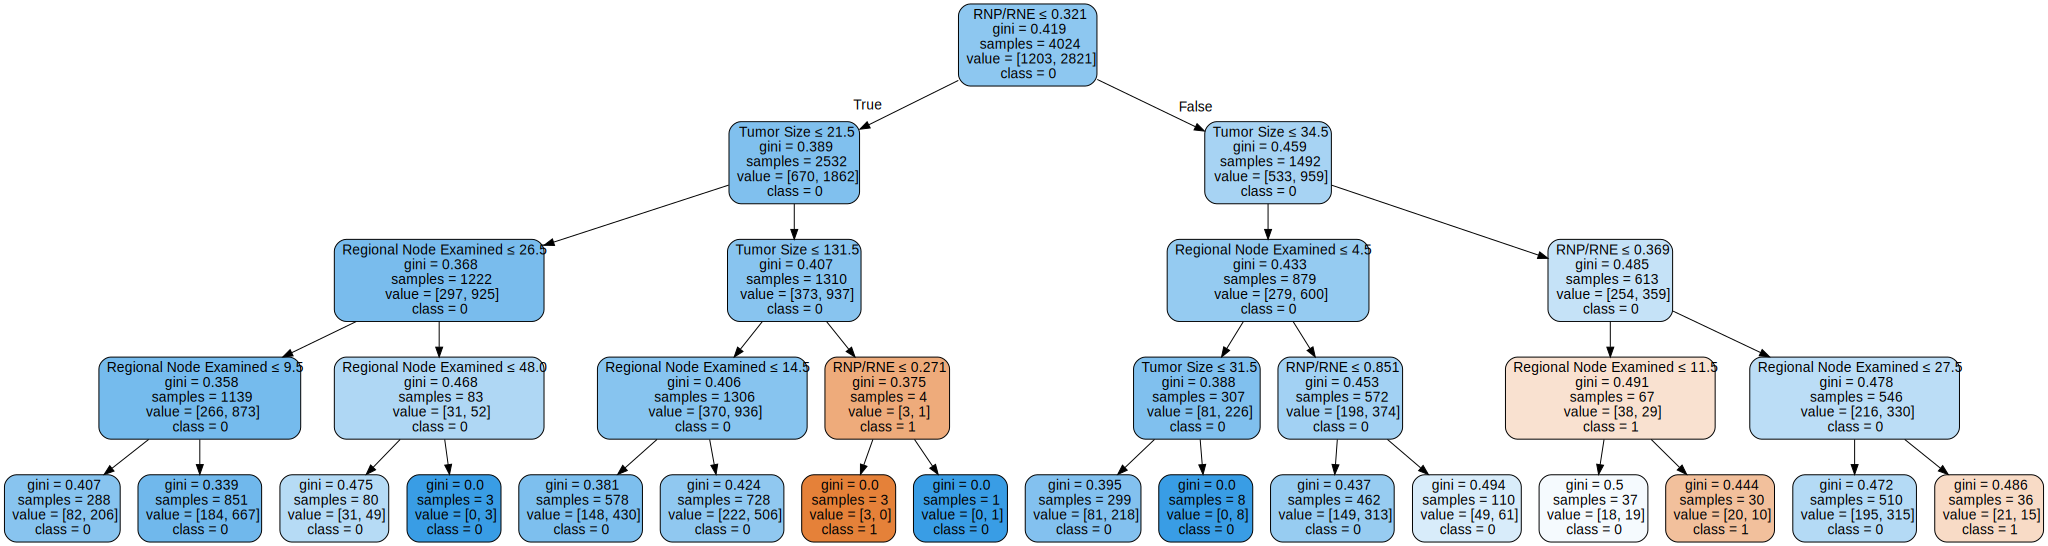

In [71]:
import graphviz
from IPython.display import display
from sklearn import tree

# Generate the dot data
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                               feature_names=X.columns.astype(str),  # me decia antes error "can only concatenate str (not "numpy.int64") to str", asique solcio de CHATGPT: agregarle el .astype(str)
                               class_names=y.unique().astype(str),
                               filled=True,
                               rounded=True,
                               special_characters=True)

# Create the graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

## Arbol con A Stage como Etiqueta

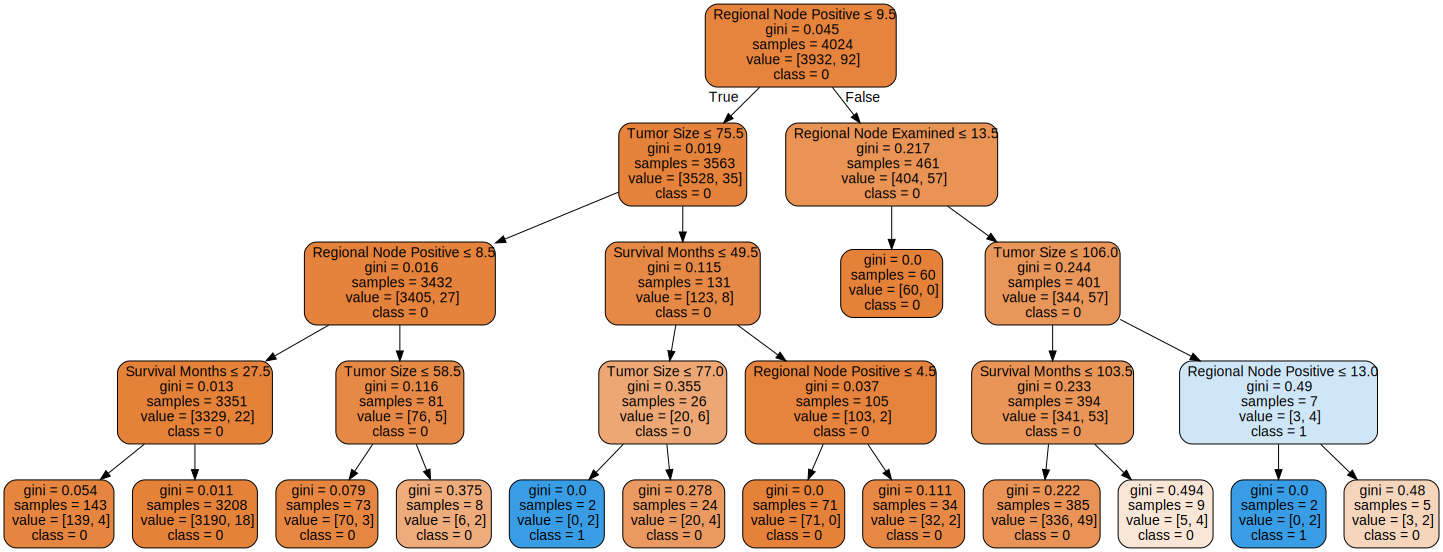

In [72]:
# Crear la instancia del modelo
clf = DecisionTreeClassifier(max_depth=4)


# Entrenar el modelo con los datos (ahora con 3 variables/features/ columans)  y la etiqueta
X = dfn[['Tumor Size', 'Survival Months', 'Regional Node Examined', 'Regional Node Positive']]
y = dfn['A Stage'] # aca probe con todas: "T Stage", "6th Stage", "Status", "Sobrevida"--> se corta en depth1, "A Stage", " Differentiate", "Grade"

clf = clf.fit(X, y)

import graphviz
from IPython.display import display
from sklearn import tree

# Generate the dot data
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                               feature_names=X.columns.astype(str),  # me decia antes error "can only concatenate str (not "numpy.int64") to str", asique solcio de CHATGPT: agregarle el .astype(str)
                               class_names=y.unique().astype(str),
                               filled=True,
                               rounded=True,
                               special_characters=True)

# Create the graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)


En este modelo se llega a niveles de impureza (Gini) Bajos con nivel 4 de depth, para clasificar por A Stage segun las variables cuantitativas: Tumor Size, Survival Months y Regional Node Positive y Regional Node Examined.



---

---





# Modelo Regresion Lineal
Este es un modelo de ML no supervisado que relaciona  dos variales numericas continuas

Text(0.5, 1.0, 'Coeficientes de correlacion de Columnas numericas')

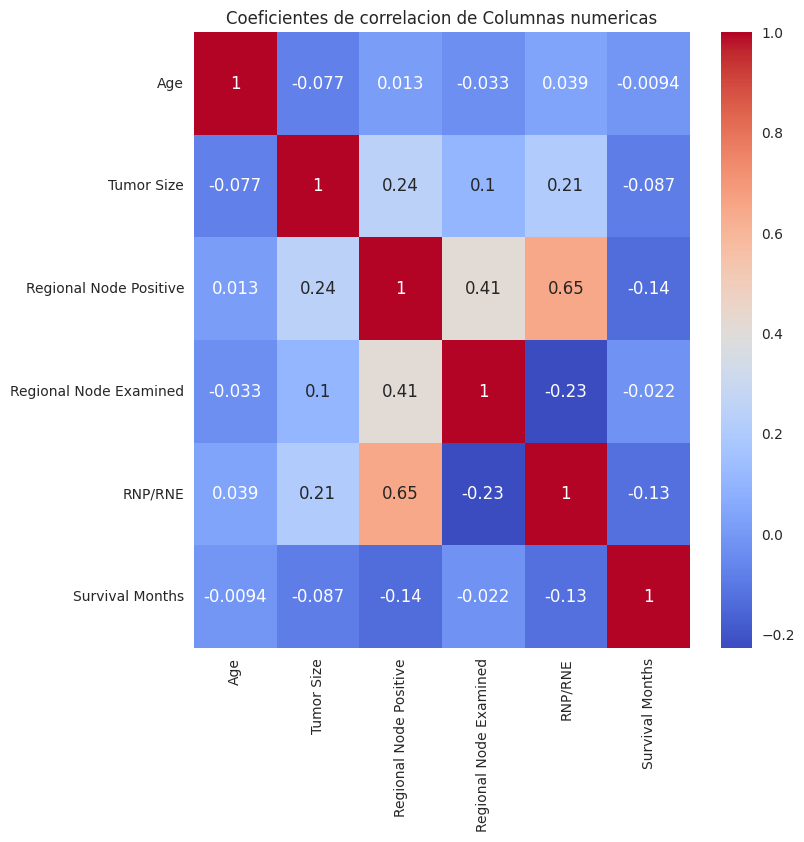

In [73]:
# Graficos HEATMAP de correlacion con SNS

# Calcular la matriz de correlación de nuemricas

columnas_numericas = df[['Age', 'Tumor Size', 'Regional Node Positive', 'Regional Node Examined', 'RNP/RNE', 'Survival Months']]

matriz_correlacion = columnas_numericas.corr()

# Crear una visualización de la matriz de correlación utilizando seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm').set_title("Coeficientes de correlacion de Columnas numericas")

En base a los resultados obtenidos en los coeficientes de correlacion de Pearson solo con las variables numericas, la mas alta es la realacion de RNP/RNE con Regional Node Positive (0.65), y luego la relacion de RNP con RNE (0.41). Pensariamos en usar la priemra o la segunda pareja para un modelo de regresion lineal, pero per se no se puede dado que no son variables independientes: ya que por definicion la RNP/RNE la calculamos con la RNP. En la segunda pareja de datos, tampoco cupliria la condicion ya que los RNP fueron evaluados de los RNE. <br>

Entonces, si quisieramos hacer un modelo de Regresion lineal que cumpla con las 4 condiciones para sus uso: 1) Normalidad, 2)Relacion lineal entre las variables x e y, 3) Independencia de las variables x e y, 4) Homocesdasticidad, deberia pensar en usar Regional Node Positive con Tumor Size, que no dependen entre si, aunque el coeficiente de correlacion de Pearson es bajo (0.21).


### Regional Node Positive - Tumor Size

In [74]:
# Definicion de variables para mi modelo

#Feature/variable independiente
X = dfn[['Tumor Size']]

#Target/variable dependiente (Variable a predecir)
y = dfn[['Regional Node Positive']]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# separacion de parte de los datos para train y parte para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)


In [76]:
#Entrenamiento del modelo con los datos
regressor = LinearRegression()
regressor.fit(X_train, y_train) # ajusto con los datos de entrenamiento: train

LinearRegression()

In [77]:
# Obtener la pendiente de la recta de regresion
slope = regressor.coef_

# Obtener el coeficiente de intercepción con eje y
intercept = regressor.intercept_

print("el valor de la pendiente es:", slope.round(1))
print("el valor del intercepto es:", intercept.round(1))

el valor de la pendiente es: [[0.1]]
el valor del intercepto es: [2.3]


In [81]:
y_pred_train = regressor.predict(X_train)
y_pred_train.round(0)
y_train
y_pred_train

array([[4.38369338],
       [4.14335526],
       [5.04462319],
       ...,
       [3.66267903],
       [4.02318621],
       [3.72276356]])

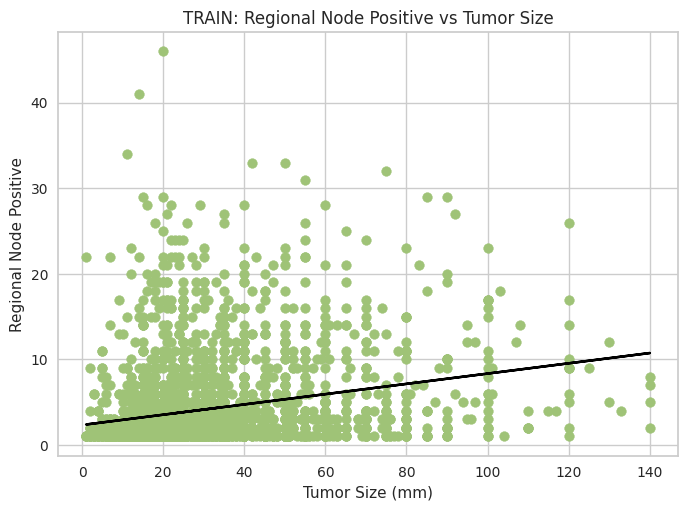

In [82]:
# Grafico del modelo entrenado con datos train

viz_train = plt
viz_train.scatter(X_train, y_train, color = 'g')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('TRAIN: Regional Node Positive vs Tumor Size')
viz_train.xlabel('Tumor Size (mm)')
viz_train.ylabel('Regional Node Positive')
viz_train.show()

A pesar de que la nube de datos parece acumularese en valores de tumor size de 20-40mm, la recta con pendiente baja se forma y puede interpretarse una leve tendencia de más Nodulos Regionales Psiitivos en mayores tamaños tumorales.<br>
Ya se ve un claro Underfitting de los datos a la recta.

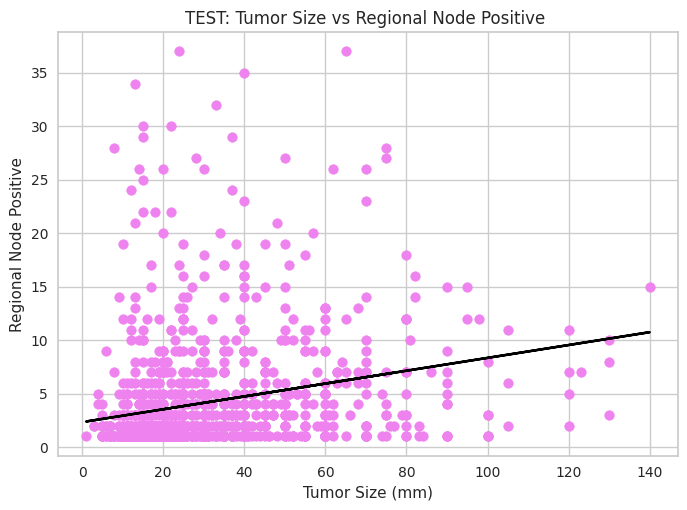

In [83]:
# Grafico del modelo  con datos test

viz_test = plt
viz_test.scatter(X_test, y_test, color = 'violet')
viz_test.plot(X_test, regressor.predict(X_test), color = 'black')
viz_test.title('TEST: Tumor Size vs Regional Node Positive ')
viz_test.xlabel('Tumor Size (mm)')
viz_test.ylabel('Regional Node Positive')
viz_test.show()

In [85]:
y_pred_test = regressor.predict(X_test)
y_pred_test.round(0)
y_test

Regional Node Positive
1493                       5
2588                       2
891                        8
1952                       5
87                         1
...                      ...
1906                       1
1436                       4
2539                       3
2849                       2
53                         2

[1208 rows x 1 columns]

In [86]:
#Input de que tamaño es el tumor a ver cuantos predice son positivos
size = int(input('Qué tamaño tuvo el tumor en mm: '))

nodulos_positivos = regressor.predict([[size]])

nodulos_positivos = int(nodulos_positivos)
nodulos_positivos
print("Segun el modelo, si el tumor mide", size, "mm, ", nodulos_positivos, "nodulos linfaticos seran positivos.")

Qué tamaño tuvo el tumor en mm: 78
Segun el modelo, si el tumor mide 78 mm,  7 nodulos linfaticos seran positivos.


### Metricas de validacion de modelo de ML para regresion:
R2 MAE MSE RMSE

In [87]:
# Score R cuadrado: cuanto se adecuan los resultados del modelo a los datos?

ScoreTRAIN = regressor.score(X_train, y_train)
ScoreTEST = regressor.score(X_test, y_test)

print("Scores R cuadrado: con datos Train: ", ScoreTRAIN, "y con datos TEST: ", ScoreTEST)

Scores R cuadrado: con datos Train:  0.062397850205752725 y con datos TEST:  0.05010249833139979


Bajisimos los dos R cuadrados: 0,06 el de Train y 0,05 el de Test.
Para corregir este underfitting habria que ver de usar modelos mas complejos u otros parametros.

In [88]:
# ahora aplicare las metricas para modelos de Regresion: MAE
# en unidades de lo que estamos midiendo: nodulos linfaticos positivos segun tamaño tumoral

from sklearn.metrics import mean_absolute_error

print("MAE",mean_absolute_error(y_train,y_pred_train)) # MAE en TRAIN ver predict en testeo y en entrenamiento para ver lo de obero underfittin
print("MAE",mean_absolute_error(y_test,y_pred_test)) # MAE en TEST

MAE 3.2800513310070767
MAE 3.1590286065452804


In [89]:
# ahora aplicare las metricas para modelos de Regresion: MSE

from sklearn.metrics import mean_squared_error

print("MSE",mean_squared_error(y_train, y_pred_train))
print("MSE",mean_squared_error(y_test, y_pred_test))

MSE 24.339084984850874
MSE 25.099643126111445


In [90]:
# ahora aplicare las metricas para modelos de Regresion: RMSE

print("RMSE",np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE 4.933465818757729
RMSE 5.0099544035960495


# Modelo de K-Means
Este modelo de ML no supervisado para problemas de clasificacion a partir de variables numericas

Para usar este modelo, armaré un Df con las variables cuantitativas: Regional Node Positive, Survival Months y Tumor Size y RNP/RNE, y aplicare el modelo de Kmeans para ver si puedo crear clusters. Antes pondré los valores en escala y evaluaré con el metodo "del codo" para definir cantidad de clusters optimos.

In [92]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [91]:
cuantitativas = dfn[["Regional Node Positive","Tumor Size","Survival Months"]]
cuantitativas

Regional Node Positive  Tumor Size  Survival Months
0                          1           4               60
1                          5          35               62
2                          7          63               75
3                          1          18               84
4                          1          41               50
...                      ...         ...              ...
4019                       1           9               49
4020                       8          46               69
4021                       3          22               69
4022                       1          44               72
4023                       2          30              100

[4024 rows x 3 columns]

In [93]:
# escalar los datos para que sean bien tomados por elbowkmeans

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# los datos deben ser estandarizados ya que al tener las variables de entrada de diferente naturaleza, puede generar ruido en la segmentación.
cuantitativas_scaled = scaler.fit_transform(cuantitativas)

cuantitativas_scaled

array([[-0.61817175, -1.25366142, -0.4929608 ],
       [ 0.16480688,  0.21434515, -0.40569537],
       [ 0.5562962 ,  1.54028657,  0.16152997],
       ...,
       [-0.22668243, -0.40127051, -0.10026634],
       [-0.61817175,  0.64054061,  0.03063182],
       [-0.42242709, -0.0224301 ,  1.25234793]])

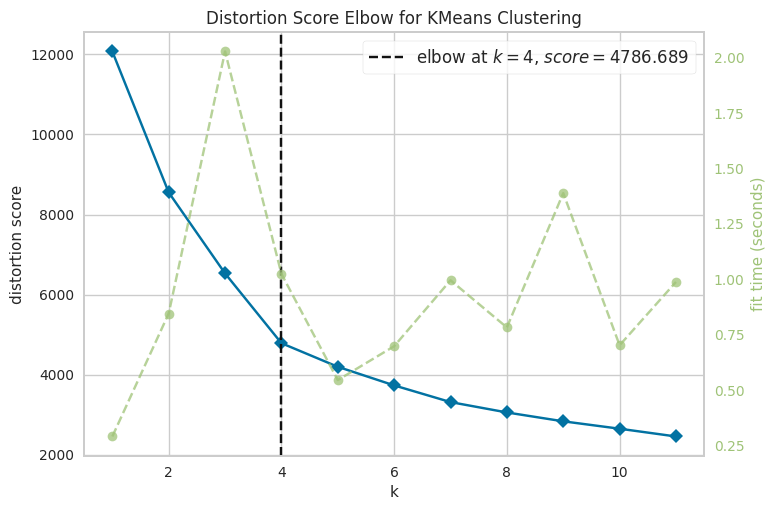

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
# grafico del codo que evalue entre 1 y 12 clusters

model = KMeans()  # modelo de skinlearn
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(cuantitativas_scaled)
visualizer.show()


In [95]:
# La prueba del codo me dio 4 clusters como numero para optimizar el agrupamiento

# Creo el modelo con 4 clusters
modelo = KMeans(n_clusters = 4, max_iter = 1000, init = 'random', random_state = 42)
preds = modelo.fit_predict(cuantitativas_scaled)

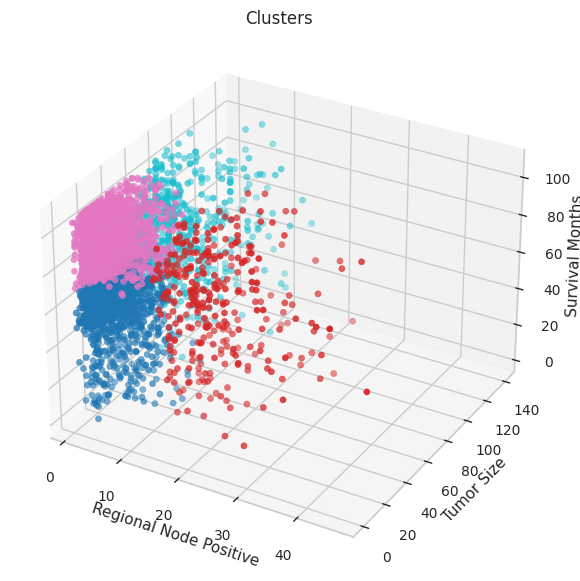

In [96]:
# graficar en 3d mis variables y los clusters
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(cuantitativas["Regional Node Positive"], cuantitativas["Tumor Size"], cuantitativas["Survival Months"], c=preds, cmap="tab10")
# c es el hue, las categorrias cluster de arriba
plt.title("Clusters")
ax.set_xlabel("Regional Node Positive")
ax.set_ylabel("Tumor Size")
ax.set_zlabel("Survival Months")
plt.show()


In [97]:
# armando el dataframe para agrupar

preds=pd.DataFrame(preds) # paso el array a pandas df asi despues lo junto con la tabla
preds
cuantitativas_concat = pd.concat([cuantitativas, preds], axis=1)
cuantitativas_concat = cuantitativas_concat.rename(columns = {0:'cluster'})
cuantitativas_concat

Regional Node Positive  Tumor Size  Survival Months  cluster
0                          1           4               60        0
1                          5          35               62        0
2                          7          63               75        3
3                          1          18               84        2
4                          1          41               50        0
...                      ...         ...              ...      ...
4019                       1           9               49        0
4020                       8          46               69        3
4021                       3          22               69        0
4022                       1          44               72        2
4023                       2          30              100        2

[4024 rows x 4 columns]

In [98]:
# agrupados describe
agrupadas = cuantitativas_concat.groupby(["cluster"])[["Regional Node Positive", "Tumor Size", "Survival Months"]].describe()
agrupadas

Regional Node Positive                                               \
                         count       mean       std   min   25%   50%   75%   
cluster                                                                       
0                       1446.0   2.746196  2.307481   1.0   1.0   2.0   4.0   
1                        313.0  18.223642  5.958818  10.0  14.0  17.0  21.0   
2                       1711.0   2.552893  2.273540   1.0   1.0   2.0   3.0   
3                        554.0   4.853791  3.786136   1.0   2.0   4.0   7.0   

              Tumor Size             ...              Survival Months  \
          max      count       mean  ...   75%    max           count   
cluster                              ...                                
0        11.0     1446.0  23.369986  ...  30.0   60.0          1446.0   
1        46.0      313.0  36.769968  ...  50.0  120.0           313.0   
2        13.0     1711.0  22.220339  ...  29.0   55.0          1711.0   
3        18.0      554.0  70.947653  ...  80.0  140.0           554.0   

                                                               
              mean        std   min    25%   50%   75%    max  
cluster                                                        
0        52.209544  15.423873   1.0  48.00  56.0  63.0   72.0  
1        61.130990  26.515334   4.0  42.00  64.0  82.0  106.0  
2        89.423729  10.476088  71.0  80.00  89.0  98.0  107.0  
3        70.884477  20.893453   4.0  57.25  71.0  87.0  107.0  

[4 rows x 24 columns]

Describiendo los cuatro grupos:

0, Azul: bajos valores de todas las categorias: pocos nodulos positivos, baja supervivencia y bajo tamaño tumoral.

1, Rojo: muchos nodulos positivos, pero tamaño tumoral y sobrevida no muy altos .

2, Rosa: bajo tamaño tumoral y pocos nodulos poitivos, pero mucha sobrevida.

3, Celeste: tamaño tumoral grande, nodulos positivos moderados y sobrevida alta.


# PCA: Principal Component Analysis
Modelo de ML no supervisado de analisis de componente principales, para reducción de la dimensionalidad (reducir las variables de mi dataset, solo para variables numericas continuas)

In [99]:
# creo un df de solo mis variables nuemricas para el modelo
df_numericas = df[['Age', 'Tumor Size', 'Regional Node Examined','Regional Node Positive', 'RNP/RNE', 'Survival Months']]
df_numericas

Age  Tumor Size  Regional Node Examined  Regional Node Positive  \
0      68           4                      24                       1   
1      50          35                      14                       5   
2      58          63                      14                       7   
3      58          18                       2                       1   
4      47          41                       3                       1   
...   ...         ...                     ...                     ...   
4019   62           9                       1                       1   
4020   56          46                      14                       8   
4021   68          22                      11                       3   
4022   58          44                      11                       1   
4023   46          30                       7                       2   

       RNP/RNE  Survival Months  
0     0.041667               60  
1     0.357143               62  
2     0.500000               75  
3     0.500000               84  
4     0.333333               50  
...        ...              ...  
4019  1.000000               49  
4020  0.571429               69  
4021  0.272727               69  
4022  0.090909               72  
4023  0.285714              100  

[4024 rows x 6 columns]

In [100]:
from sklearn.decomposition import PCA

# Creamos la instancia del modelo
modelo_pca = PCA(n_components = 6) # el maximo de componentes sera el maximo de variables seleccionadas, asi despues yo elijo dentro de los componentes hechos los que mas convengan

# Entrenamos el modelo con nuestros datos numericos
modelo_pca.fit(df_numericas)

PCA(n_components=6)

In [101]:
modelo_pca.explained_variance_ratio_[0]  # cuanto explica mi modelo la varianza de los datos: 0.4.... no demasiado

0.4766459135624191

In [102]:
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'] #indice
componentes = pd.DataFrame(data = modelo_pca.components_, columns = df_numericas.columns, index = lista_componentes)
componentes


Age  Tumor Size  Regional Node Examined  Regional Node Positive  \
PC1 -0.009058    0.406223                0.024700                0.049103   
PC2 -0.040509    0.909536                0.042323                0.044590   
PC3 -0.991682   -0.046729                0.119491                0.006618   
PC4  0.117790   -0.060751                0.936699                0.323734   
PC5 -0.031127   -0.043038               -0.324766                0.942512   
PC6  0.000383    0.000766               -0.021052                0.049234   

      RNP/RNE  Survival Months  
PC1  0.002390        -0.912071  
PC2  0.001907         0.409047  
PC3 -0.002608        -0.007379  
PC4 -0.003790         0.014558  
PC5  0.053268         0.023226  
PC6 -0.998565        -0.000199

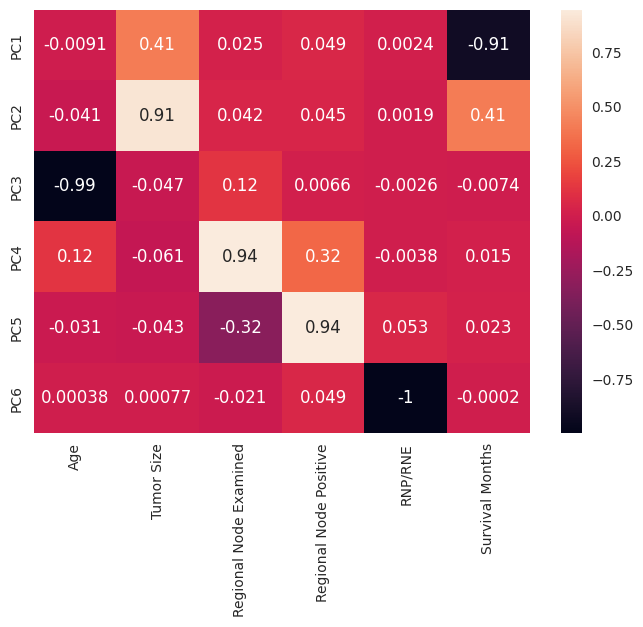

In [103]:
ax = sns.heatmap(componentes, annot=True)
# hago el heatmap con los valores de cada variable que contribuyen a cada ocmponente

In [104]:
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
[48. 38.  7.  6.  2.  0.]


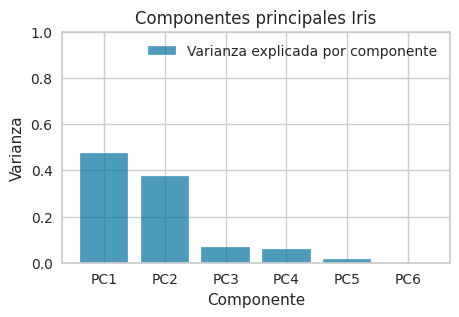

In [108]:
# Gráfico cuanto de varianza del modelo explica cada componente:
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label = 'Varianza explicada por componente')


ax.set_title('Componentes principales Iris')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1)
ax.legend(bbox_to_anchor = (1, 1))

Si tomo Pc1 y Pc2 me significa 86% de los datos y con Pc3 93% <br>

- PC1 se compone principalmente de Survival Months y algo de Tumor Size <br>
- PC2 principalmente de Tumor Size y algo de Survival Months<br>
- PC3 casi totalmente de Age <br>
- PC4 de Regional Node Examined y algo de Regional Node Positive <br>
- PC5 se compone mayormente de Regional Node Positive y algo de Regional Node Examined <br>
<br>

Eligire las que me resultan mas relevantes: PC1, PC2 y PC3, si bien ninguna de las dos supera el 60%, entre ambas predicen 86% de los resultados.

In [109]:
proyecciones = pd.DataFrame(modelo_pca.transform(df_numericas), index=df_numericas.index,columns=lista_componentes)
proyecciones



PC1        PC2        PC3        PC4       PC5       PC6
0     -0.494278 -29.001655 -11.458630  11.107367 -5.683022 -0.086742
1     10.387681   0.496962   3.759044  -0.940275  0.624032  0.022137
2      9.931068  31.046969  -5.565877  -0.862804  1.364519 -0.000127
3    -17.148602  -6.976150  -5.003085 -11.180768  1.752404 -0.079169
4     23.328881   0.523179   5.201454 -13.431383 -0.018429  0.086382
...         ...        ...        ...        ...       ...       ...
4019  11.058161 -29.682041  -8.411798 -11.610974  1.553717 -0.555785
4020   8.565103  13.256315  -2.737420   0.170500  2.965384 -0.034809
4021  -1.613256  -9.409155 -13.906898  -1.385623 -0.129388  0.066664
4022   4.579362  12.143349  -5.053008  -4.503156 -2.589997  0.162172
4023 -26.586294  11.224951   6.822927  -8.082295  1.288356  0.080188

[4024 rows x 6 columns]

In [110]:
# me quedo solo con PC 1, 2 y 3
proyecciones.drop(columns=['PC4','PC5', 'PC6'], inplace=True)
proyecciones

PC1        PC2        PC3
0     -0.494278 -29.001655 -11.458630
1     10.387681   0.496962   3.759044
2      9.931068  31.046969  -5.565877
3    -17.148602  -6.976150  -5.003085
4     23.328881   0.523179   5.201454
...         ...        ...        ...
4019  11.058161 -29.682041  -8.411798
4020   8.565103  13.256315  -2.737420
4021  -1.613256  -9.409155 -13.906898
4022   4.579362  12.143349  -5.053008
4023 -26.586294  11.224951   6.822927

[4024 rows x 3 columns]

In [111]:
# Agreguemos la columna de las especies para poderla utilizar más adelante
proyecciones['Sobrevida'] = df['Sobrevida'] # Esto solo funciona por que tienen el mismo index
proyecciones

PC1        PC2        PC3  Sobrevida
0     -0.494278 -29.001655 -11.458630          1
1     10.387681   0.496962   3.759044          1
2      9.931068  31.046969  -5.565877          1
3    -17.148602  -6.976150  -5.003085          1
4     23.328881   0.523179   5.201454          0
...         ...        ...        ...        ...
4019  11.058161 -29.682041  -8.411798          0
4020   8.565103  13.256315  -2.737420          1
4021  -1.613256  -9.409155 -13.906898          1
4022   4.579362  12.143349  -5.053008          1
4023 -26.586294  11.224951   6.822927          1

[4024 rows x 4 columns]

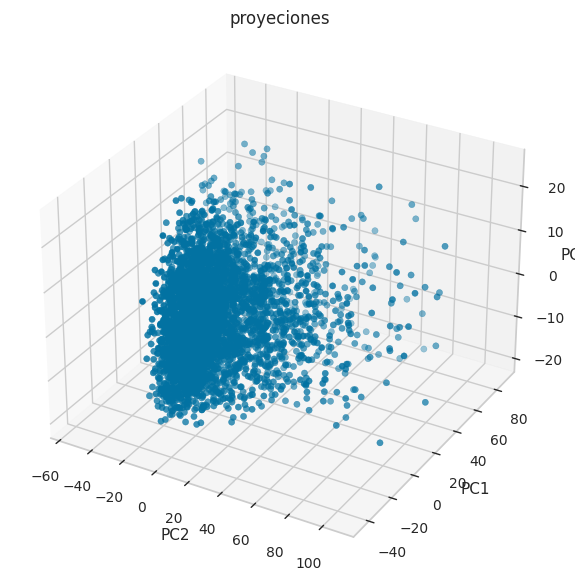

In [112]:

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(proyecciones["PC2"], proyecciones["PC1"], proyecciones["PC3"] )
plt.title("proyeciones")
ax.set_xlabel("PC2")
ax.set_ylabel("PC1")
ax.set_zlabel("PC3")
plt.show()

Una vez dimensionados mis observaciones con estas 3 variables creadas con el modelo de PCA, puedo hacer modelos de Machine Learning:

## Modelo de ML Supervisado: K Nearest Neighbour

Repetiremos el modelo de clasificacion e intentaremos que clasifique por la target feature Sobrevida, tomando las 3 componentes creadas con PCA como variables.

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [114]:
proyecciones_features = proyecciones[["PC1", "PC2", "PC3"]]
proyecciones_features # xs

PC1        PC2        PC3
0     -0.494278 -29.001655 -11.458630
1     10.387681   0.496962   3.759044
2      9.931068  31.046969  -5.565877
3    -17.148602  -6.976150  -5.003085
4     23.328881   0.523179   5.201454
...         ...        ...        ...
4019  11.058161 -29.682041  -8.411798
4020   8.565103  13.256315  -2.737420
4021  -1.613256  -9.409155 -13.906898
4022   4.579362  12.143349  -5.053008
4023 -26.586294  11.224951   6.822927

[4024 rows x 3 columns]

In [115]:
proyecciones_target = proyecciones[["Sobrevida"]]
proyecciones_target # Y

Sobrevida
0             1
1             1
2             1
3             1
4             0
...         ...
4019          0
4020          1
4021          1
4022          1
4023          1

[4024 rows x 1 columns]

In [116]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(proyecciones_features, proyecciones_target, test_size = 0.3, random_state=42)

# Creamos un KNN
modelo = KNeighborsClassifier(n_neighbors = 3)
modelo.fit(X_train, y_train)

# Obtenemos las predicciones del modelo con X_test


KNeighborsClassifier(n_neighbors=3)

In [117]:
preds_train = modelo.predict(X_train)
preds_test = modelo.predict(X_test)

In [118]:
preds_train

array([1, 0, 0, ..., 0, 1, 1])

In [119]:
preds_test

array([1, 0, 1, ..., 1, 0, 0])

### Grafico 3d con c Sobrevida en proyecciones
ahora puedo poner hue de ver esos grupos predichos por el modelo de Kmeans en el grafico 3D

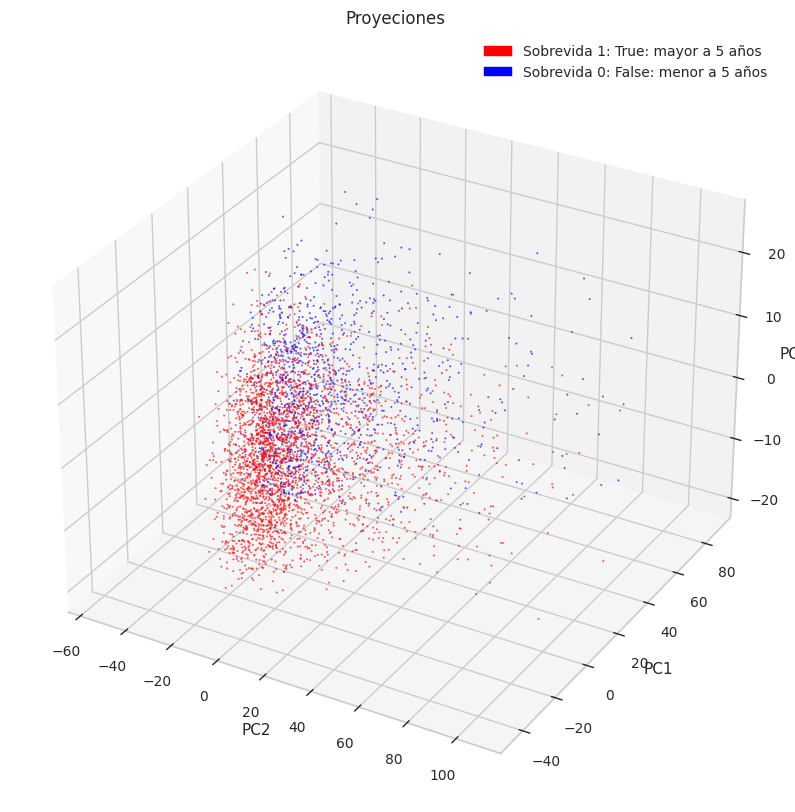

In [120]:

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(proyecciones["PC2"], proyecciones["PC1"], proyecciones["PC3"], c=Sobrevida, alpha=0.6, s=1.2, cmap="bwr")
plt.title("Proyeciones")
ax.set_xlabel("PC2")
ax.set_ylabel("PC1")
ax.set_zlabel("PC3")
ax.legend("topright")

# Crear la leyenda con ayda de chat gpt
red_patch = mpatches.Patch(color='red', label='Sobrevida 1: True: mayor a 5 años')
blue_patch = mpatches.Patch(color='blue', label='Sobrevida 0: False: menor a 5 años')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

plt.show()

### Metricas del modelo de K Nearest Neughbours 3

In [121]:
print(metrics.classification_report(y_train, preds_train)) #TRAIN

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       836
           1       1.00      0.99      1.00      1980

    accuracy                           0.99      2816
   macro avg       0.99      0.99      0.99      2816
weighted avg       0.99      0.99      0.99      2816



In [122]:
print(metrics.classification_report(y_test, preds_test)) #TEST

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       367
           1       0.99      0.98      0.98       841

    accuracy                           0.98      1208
   macro avg       0.97      0.98      0.97      1208
weighted avg       0.98      0.98      0.98      1208



En ambos conjuntos de datos: train y test, la target feature Sobrevida queda desvalanceada (el doble de registros en la Sobrevida True con respecto a cuando es False), por lo tanto miraria el F1Score como métrica, ya que Accrancy no es bueno en casos de datos desbalanceados.
F1 Score es una metrica que combina los valores de Presiscion y Sensibilidad (Recall) del modelo. El valor alto cercano a 1, con valores de pecision y recall altos,  significa que predice con bajos falsos positivos y falsos negativos.

In [123]:
df

Age  Race  Marital Status  T Stage  N Stage  6th Stage  Differentiate  \
0      68     2               1        0        0          0              1   
1      50     2               1        1        1          2              0   
2      58     2               0        2        2          4              0   
3      58     2               1        0        0          0              1   
4      47     2               1        1        0          1              1   
...   ...   ...             ...      ...      ...        ...            ...   
4019   62     1               1        0        0          0              0   
4020   56     2               0        1        1          2              0   
4021   68     2               1        1        0          1              0   
4022   58     0               0        1        0          1              0   
4023   46     2               1        1        0          1              0   

      A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0           0           4                1                    1   
1           0          35                1                    1   
2           0          63                1                    1   
3           0          18                1                    1   
4           0          41                1                    1   
...       ...         ...              ...                  ...   
4019        0           9                1                    1   
4020        0          46                1                    1   
4021        0          22                1                    0   
4022        0          44                1                    1   
4023        0          30                1                    1   

      Regional Node Examined  Regional Node Positive  Survival Months  Status  \
0                         24                       1               60       1   
1                         14                       5               62       1   
2                         14                       7               75       1   
3                          2                       1               84       1   
4                          3                       1               50       1   
...                      ...                     ...              ...     ...   
4019                       1                       1               49       1   
4020                      14                       8               69       1   
4021                      11                       3               69       1   
4022                      11                       1               72       1   
4023                       7                       2              100       1   

      Sobrevida   RNP/RNE  T Stage sin T4  
0             1  0.041667             0.0  
1             1  0.357143             1.0  
2             1  0.500000             2.0  
3             1  0.500000             0.0  
4             0  0.333333             1.0  
...         ...       ...             ...  
4019          0  1.000000             0.0  
4020          1  0.571429             1.0  
4021          1  0.272727             1.0  
4022          1  0.090909             1.0  
4023          1  0.285714             1.0  

[4024 rows x 18 columns]

# ⏏ Conclusion intermedia

En base a lo desarrollado, ningun modelo muestro un buen desempeño para predecir las variables propuestas. Quizas por la correlacion entre variables y la cantidad de variables categoricas.
Para futuras lineas de analisis propondria con el conocimienmto del tema reducir las veriables que se correlacionan.:

- Siendo 6th stage combinacion de Tumor Size, T Stage (que a su vez depende de Tumor Size), N Stage y A stage (que hablan de la cantidad y disposicion de nodulos linfaticos afectados), simplifico esas variables a usar solo 6th stage. <br>
- Tambien elimino la variable Status ya que no considero interpretable el dato de si esta Alive o Dead ya que no se a que momento se refiere. <br>
-  Y ya teniendo mi variable binaria "Sobrevida" que sera mi target feature, elimino "Survival Months". <br>



# df_reducido

In [124]:
# volvere a cargar la base y le hare las modificaciones iniciales para probar otra forma de encodeo de datos

url = 'https://raw.githubusercontent.com/LuisaBeccar/Clases-de-CoderHouse-Data-Science/main/Breast_Cancer.csv'
df = pd.read_csv(url)
df

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

In [125]:
# Creacion de mi variable objetivo, y edicion de otras features

# Agrego variable objetivo Sobrevida si "survival months" > 60 meses (5 años)
Sobrevida = []
for i in df["Survival Months"]: #para cada elemento de "survival months", evalua si es mayor a 60 meses (5 años) (TRUE) y el resultado booleano (TRUE O FALSE) agregalo a la lista "Sobrevida"
    Sobrevida.append(i >= 60)
Sobrevida = pd.Series(Sobrevida)
df["Sobrevida"] = Sobrevida

# modificar el nombre de Reginol Node Positive por Regional Node Positive
df.rename(columns={'Reginol Node Positive':'Regional Node Positive'}, inplace=True)

# modificar el nombre de "differentiate" por "Differentiate" sin espacio final
df.rename(columns={'differentiate':'Differentiate'}, inplace=True)

# eliminar la columna Grade porque habla de lo mismo que Differentiate
df.drop('Grade', axis=1, inplace=True)

# relacion RNP y RNE: ya que el maximo de RNP depende de RNE
df["RNP/RNE"] = df["Regional Node Positive"] / df["Regional Node Examined"]

In [126]:
# Renombrar nombre de columnas sin espacios en blanco antes o despues
columnas = df.columns

for columna in columnas:
    sin_espacio = columna.strip()
    if sin_espacio!=columna:
        df= df.rename(columns = {columna: sin_espacio})


In [127]:
# Sacar espacios pre y post strings de objetos

def whitespace_remover(miDataFrame): # defino la funcion
    for i in miDataFrame.columns:  # para cada columna
        if miDataFrame[i].dtype == 'object': # chequiar que sea tipo objeto
            miDataFrame[i] = miDataFrame[i].map(str.strip) # aplicarle la fx strip asl string
        else: # si no es objeto el dato pasa al siguiente
            pass

whitespace_remover(df)


Modificaciones para df_reducido

In [128]:

df_reducido = df.drop(["Tumor Size", "T Stage", "N Stage", "A Stage", "Status", "Survival Months"], axis=1)

df_reducido


Age   Race Marital Status 6th Stage              Differentiate  \
0      68  White        Married       IIA      Poorly differentiated   
1      50  White        Married      IIIA  Moderately differentiated   
2      58  White       Divorced      IIIC  Moderately differentiated   
3      58  White        Married       IIA      Poorly differentiated   
4      47  White        Married       IIB      Poorly differentiated   
...   ...    ...            ...       ...                        ...   
4019   62  Other        Married       IIA  Moderately differentiated   
4020   56  White       Divorced      IIIA  Moderately differentiated   
4021   68  White        Married       IIB  Moderately differentiated   
4022   58  Black       Divorced       IIB  Moderately differentiated   
4023   46  White        Married       IIB  Moderately differentiated   

     Estrogen Status Progesterone Status  Regional Node Examined  \
0           Positive            Positive                      24   
1           Positive            Positive                      14   
2           Positive            Positive                      14   
3           Positive            Positive                       2   
4           Positive            Positive                       3   
...              ...                 ...                     ...   
4019        Positive            Positive                       1   
4020        Positive            Positive                      14   
4021        Positive            Negative                      11   
4022        Positive            Positive                      11   
4023        Positive            Positive                       7   

      Regional Node Positive  Sobrevida   RNP/RNE  
0                          1       True  0.041667  
1                          5       True  0.357143  
2                          7       True  0.500000  
3                          1       True  0.500000  
4                          1      False  0.333333  
...                      ...        ...       ...  
4019                       1      False  1.000000  
4020                       8       True  0.571429  
4021                       3       True  0.272727  
4022                       1       True  0.090909  
4023                       2       True  0.285714  

[4024 rows x 11 columns]

In [129]:
# Agregare una columna que me diga cuando un registro tiene ambos marcadores tumorales positivos
df_reducido["ES y PS Positivo"] = (df_reducido["Estrogen Status"] == "Positive") & (df_reducido["Progesterone Status"] == "Positive")
df_reducido["ES y PS Positivo"]

0        True
1        True
2        True
3        True
4        True
        ...  
4019     True
4020     True
4021    False
4022     True
4023     True
Name: ES y PS Positivo, Length: 4024, dtype: bool

In [130]:
df_reducido.columns
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   6th Stage               4024 non-null   object 
 4   Differentiate           4024 non-null   object 
 5   Estrogen Status         4024 non-null   object 
 6   Progesterone Status     4024 non-null   object 
 7   Regional Node Examined  4024 non-null   int64  
 8   Regional Node Positive  4024 non-null   int64  
 9   Sobrevida               4024 non-null   bool   
 10  RNP/RNE                 4024 non-null   float64
 11  ES y PS Positivo        4024 non-null   bool   
dtypes: bool(2), float64(1), int64(3), object(6)
memory usage: 322.4+ KB


Con esta base reducida (df_reducido) de 12 variables, vemos como el problema toma mayoria de variables categoricas <br>

- Catagoricas:
  - binarias: Estrogen Status, Progesterone Status, Sobrevida, ES y PS Positivo <br>
  - multicategoricas: <br>
    - ordinales: 6th Stage, Differentiate
    - nominales: Race, Marital Status
<br>

- Numericas: Age, RNP/RNE, Regional None Examined

Desarrollare otra manera de encodear los datos

In [131]:
df_reducido_encodeado = df_reducido.copy()

## Ordinal encoding para categoricas ordinales:

https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html


In [133]:
print("6th Stage", df_reducido["6th Stage"].unique())
print("Differentiate", df_reducido["Differentiate"].unique())


6th Stage ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
Differentiate ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']


In [134]:
sixthS_dict = {'IIA': 1,'IIB': 2,'IIIA': 3,"IIIB":4, "IIIC":5}
df_reducido_encodeado["6th Stage"] = df_reducido_encodeado['6th Stage'].map(sixthS_dict)

diff_dict = {'Poorly differentiated': 3,'Moderately differentiated': 2, 'Well differentiated': 1, 'Undifferentiated':4}
df_reducido_encodeado["Differentiate"] = df_reducido_encodeado['Differentiate'].map(diff_dict)



In [135]:
df_reducido_encodeado

Age   Race Marital Status  6th Stage  Differentiate Estrogen Status  \
0      68  White        Married          1              3        Positive   
1      50  White        Married          3              2        Positive   
2      58  White       Divorced          5              2        Positive   
3      58  White        Married          1              3        Positive   
4      47  White        Married          2              3        Positive   
...   ...    ...            ...        ...            ...             ...   
4019   62  Other        Married          1              2        Positive   
4020   56  White       Divorced          3              2        Positive   
4021   68  White        Married          2              2        Positive   
4022   58  Black       Divorced          2              2        Positive   
4023   46  White        Married          2              2        Positive   

     Progesterone Status  Regional Node Examined  Regional Node Positive  \
0               Positive                      24                       1   
1               Positive                      14                       5   
2               Positive                      14                       7   
3               Positive                       2                       1   
4               Positive                       3                       1   
...                  ...                     ...                     ...   
4019            Positive                       1                       1   
4020            Positive                      14                       8   
4021            Negative                      11                       3   
4022            Positive                      11                       1   
4023            Positive                       7                       2   

      Sobrevida   RNP/RNE  ES y PS Positivo  
0          True  0.041667              True  
1          True  0.357143              True  
2          True  0.500000              True  
3          True  0.500000              True  
4         False  0.333333              True  
...         ...       ...               ...  
4019      False  1.000000              True  
4020       True  0.571429              True  
4021       True  0.272727             False  
4022       True  0.090909              True  
4023       True  0.285714              True  

[4024 rows x 12 columns]

## Label Encoder para categoricas no ordinales y binarias

In [136]:
#Ahora con con label encoder el resto de las categoricas no ordinales
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

cols = ['Race', 'Marital Status', "Sobrevida", "Estrogen Status", "Progesterone Status", "ES y PS Positivo" ]
df_reducido_encodeado[cols] = df_reducido_encodeado[cols].apply(LabelEncoder().fit_transform)




In [137]:
df_reducido_encodeado # completo con categoricas binarias


Age  Race  Marital Status  6th Stage  Differentiate  Estrogen Status  \
0      68     2               1          1              3                1   
1      50     2               1          3              2                1   
2      58     2               0          5              2                1   
3      58     2               1          1              3                1   
4      47     2               1          2              3                1   
...   ...   ...             ...        ...            ...              ...   
4019   62     1               1          1              2                1   
4020   56     2               0          3              2                1   
4021   68     2               1          2              2                1   
4022   58     0               0          2              2                1   
4023   46     2               1          2              2                1   

      Progesterone Status  Regional Node Examined  Regional Node Positive  \
0                       1                      24                       1   
1                       1                      14                       5   
2                       1                      14                       7   
3                       1                       2                       1   
4                       1                       3                       1   
...                   ...                     ...                     ...   
4019                    1                       1                       1   
4020                    1                      14                       8   
4021                    0                      11                       3   
4022                    1                      11                       1   
4023                    1                       7                       2   

      Sobrevida   RNP/RNE  ES y PS Positivo  
0             1  0.041667                 1  
1             1  0.357143                 1  
2             1  0.500000                 1  
3             1  0.500000                 1  
4             0  0.333333                 1  
...         ...       ...               ...  
4019          0  1.000000                 1  
4020          1  0.571429                 1  
4021          1  0.272727                 0  
4022          1  0.090909                 1  
4023          1  0.285714                 1  

[4024 rows x 12 columns]

In [138]:
print(df_reducido_encodeado.columns)
print(df_reducido_encodeado.info())

Index(['Age', 'Race', 'Marital Status', '6th Stage', 'Differentiate',
       'Estrogen Status', 'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Sobrevida', 'RNP/RNE', 'ES y PS Positivo'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   int64  
 2   Marital Status          4024 non-null   int64  
 3   6th Stage               4024 non-null   int64  
 4   Differentiate           4024 non-null   int64  
 5   Estrogen Status         4024 non-null   int64  
 6   Progesterone Status     4024 non-null   int64  
 7   Regional Node Examined  4024 non-null   int64  
 8   Regional Node Positive  4024 non-null   int64  
 9   Sobrevida               4024 non-null   int64  
 10  RNP/RNE

## Nueva matriz de correlacion con df_reducido

Text(0.5, 1.0, 'Coeficientes de correlacion de df_reducido_encodeado')

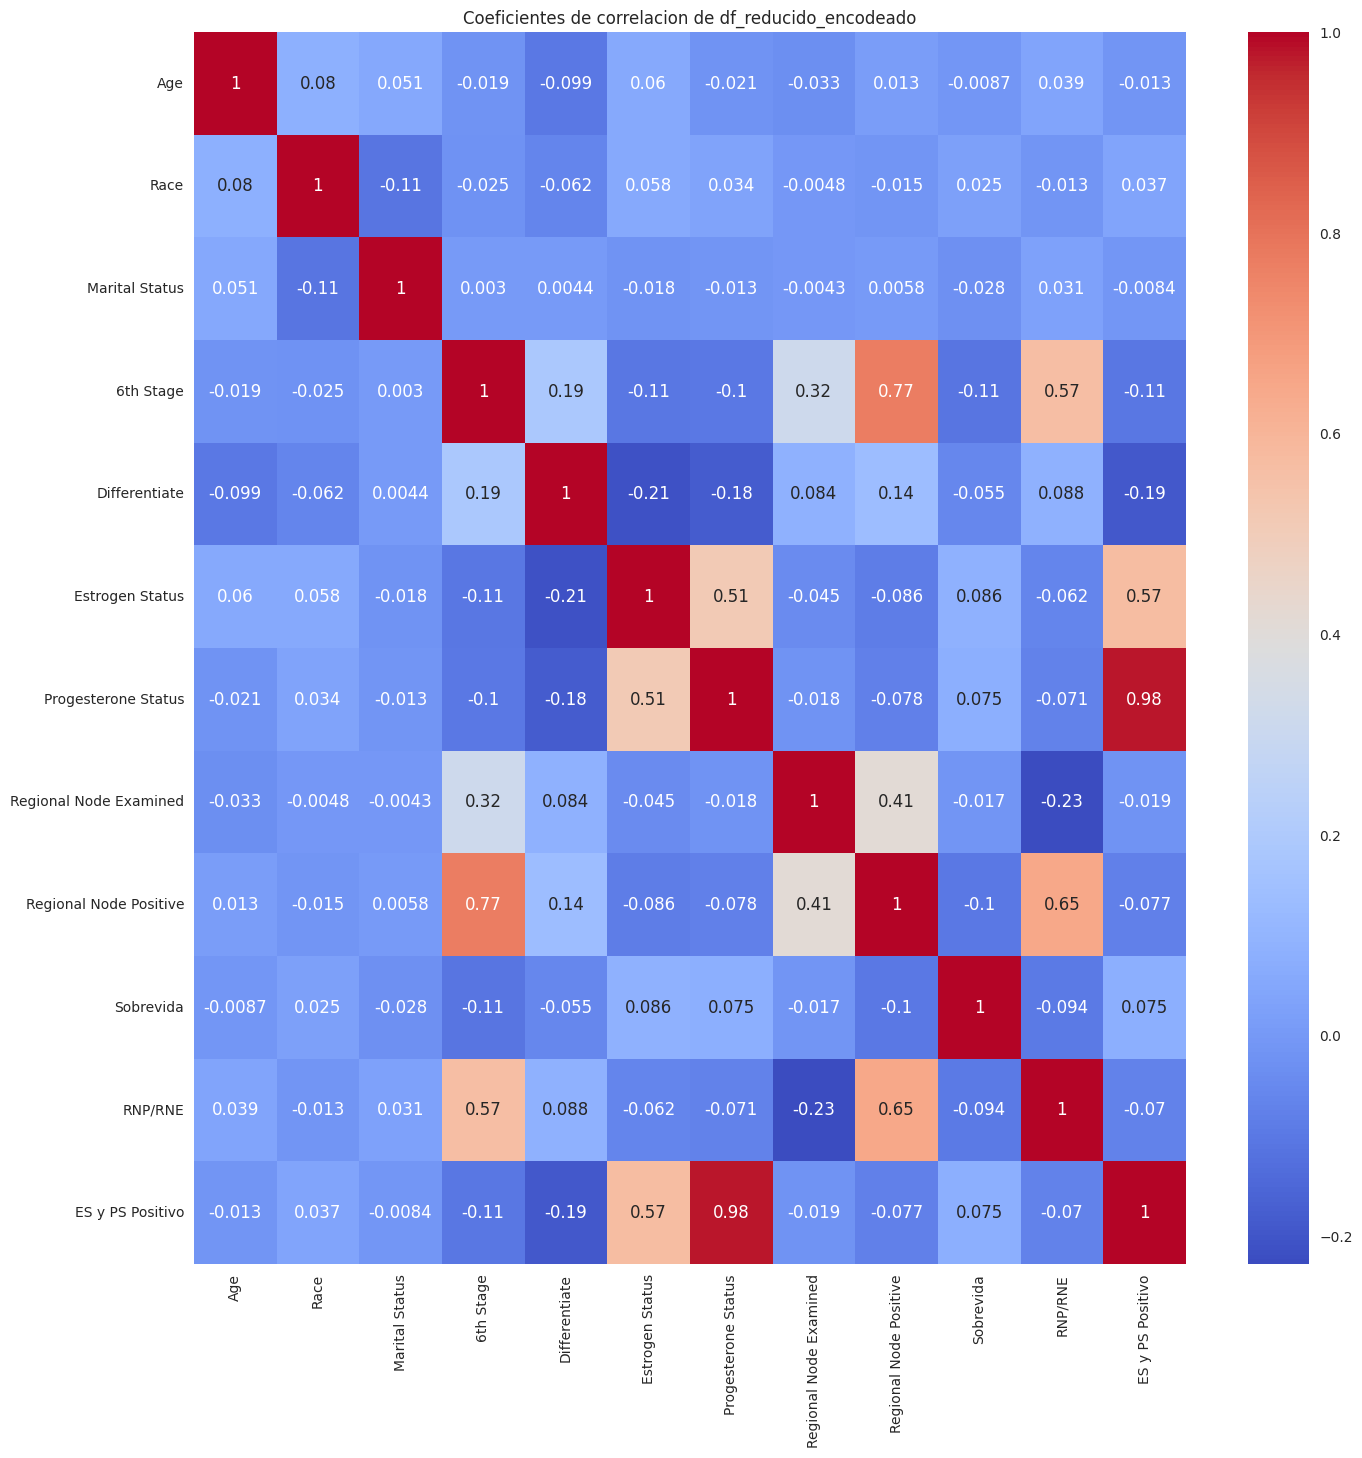

In [139]:
# Graficos HEATMAP de correlacion con SNS

#Correlacion
#columnas_seleccionadas = df_reducido_encodeado[['Age', 'Race', 'Marital Status', '6th Stage', 'Differentiate','Estrogen Status', 'Progesterone Status', 'Sobrevida', 'Regional Node Examined', 'RNP/RNE','ES y PS Positivo']]

# Calcular la matriz de correlación
matriz_correlacion = df_reducido_encodeado.corr()

# Crear una visualización de la matriz de correlación utilizando seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm').set_title("Coeficientes de correlacion de df_reducido_encodeado")


De aqui se puede deducir que la mayoria de los Progesterone Status son tambien Estrogen Status por lo que se relaciona con la nueva varaible ES y PC Positivo con fuerza.

In [140]:
# vuelvo a object todas las categoricas
df_reducido_encodeado['Race'] = df_reducido['Race'].astype(object)
df_reducido_encodeado['Marital Status'] = df_reducido['Marital Status'].astype(object)
df_reducido_encodeado['6th Stage'] = df_reducido['6th Stage'].astype(object)
df_reducido_encodeado['Differentiate'] = df_reducido['Differentiate'].astype(object)
df_reducido_encodeado["Sobrevida"] = df_reducido["Sobrevida"].astype(object)
df_reducido_encodeado["Estrogen Status"] = df_reducido["Estrogen Status"].astype(object)
df_reducido_encodeado["Progesterone Status"] = df_reducido["Progesterone Status"].astype(object)
df_reducido_encodeado["ES y PS Positivo"] = df_reducido["ES y PS Positivo"].astype(object)
df_reducido_encodeado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   6th Stage               4024 non-null   object 
 4   Differentiate           4024 non-null   object 
 5   Estrogen Status         4024 non-null   object 
 6   Progesterone Status     4024 non-null   object 
 7   Regional Node Examined  4024 non-null   int64  
 8   Regional Node Positive  4024 non-null   int64  
 9   Sobrevida               4024 non-null   object 
 10  RNP/RNE                 4024 non-null   float64
 11  ES y PS Positivo        4024 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 377.4+ KB


In [ ]:
# tambien en el original reducido sin encodear vuelvo objeto las categorias
df_reducido['Race'] = df_reducido['Race'].astype(object)
df_reducido['Marital Status'] = df_reducido['Marital Status'].astype(object)
df_reducido['6th Stage'] = df_reducido['6th Stage'].astype(object)
df_reducido['Differentiate'] = df_reducido['Differentiate'].astype(object)
df_reducido["Sobrevida"] = df_reducido["Sobrevida"].astype(object)
df_reducido["Estrogen Status"] = df_reducido["Estrogen Status"].astype(object)
df_reducido["Progesterone Status"] = df_reducido["Progesterone Status"].astype(object)
df_reducido["ES y PS Positivo"] = df_reducido["ES y PS Positivo"].astype(object)

df_reducido.info()


In [142]:
# describo las cuantitativas
df_reducido.describe()

Age  Regional Node Examined  Regional Node Positive  \
count  4024.000000             4024.000000             4024.000000   
mean     53.972167               14.357107                4.158052   
std       8.963134                8.099675                5.109331   
min      30.000000                1.000000                1.000000   
25%      47.000000                9.000000                1.000000   
50%      54.000000               14.000000                2.000000   
75%      61.000000               19.000000                5.000000   
max      69.000000               61.000000               46.000000   

           RNP/RNE  
count  4024.000000  
mean      0.326468  
std       0.287022  
min       0.020408  
25%       0.103448  
50%       0.214286  
75%       0.500000  
max       1.000000

In [143]:
df_reducido_encodeado.describe() # chequeo que me esten dando iguales

Age  Regional Node Examined  Regional Node Positive  \
count  4024.000000             4024.000000             4024.000000   
mean     53.972167               14.357107                4.158052   
std       8.963134                8.099675                5.109331   
min      30.000000                1.000000                1.000000   
25%      47.000000                9.000000                1.000000   
50%      54.000000               14.000000                2.000000   
75%      61.000000               19.000000                5.000000   
max      69.000000               61.000000               46.000000   

           RNP/RNE  
count  4024.000000  
mean      0.326468  
std       0.287022  
min       0.020408  
25%       0.103448  
50%       0.214286  
75%       0.500000  
max       1.000000

In [144]:

df_reducido.describe(include='object') # uso el no encodeado para ver que variables son cada una

Race Marital Status 6th Stage              Differentiate  \
count    4024           4024      4024                       4024   
unique      3              5         5                          4   
top     White        Married       IIA  Moderately differentiated   
freq     3413           2643      1305                       2351   

       Estrogen Status Progesterone Status Sobrevida ES y PS Positivo  
count             4024                4024      4024             4024  
unique               2                   2         2                2  
top           Positive            Positive      True             True  
freq              3755                3326      2821             3299

Algo que se puede concluir de la nueva variable introducida "ES y PS Positivo" es que la mayoria tiene ambos marcadores tumorales positivos.



In [146]:
# creare un df con los Regional Nodes como object para ver si  sale algun analisis iluminador

dfNodesObject = df_reducido
dfNodesObject['Regional Node Examined'] = df_reducido['Regional Node Examined'].astype(object)
dfNodesObject['Regional Node Positive'] = df_reducido['Regional Node Positive'].astype(object)
dfNodesObject.info()
dfNodesObject.describe(include='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   6th Stage               4024 non-null   object 
 4   Differentiate           4024 non-null   object 
 5   Estrogen Status         4024 non-null   object 
 6   Progesterone Status     4024 non-null   object 
 7   Regional Node Examined  4024 non-null   object 
 8   Regional Node Positive  4024 non-null   object 
 9   Sobrevida               4024 non-null   object 
 10  RNP/RNE                 4024 non-null   float64
 11  ES y PS Positivo        4024 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 377.4+ KB


Race Marital Status 6th Stage              Differentiate  \
count    4024           4024      4024                       4024   
unique      3              5         5                          4   
top     White        Married       IIA  Moderately differentiated   
freq     3413           2643      1305                       2351   

       Estrogen Status Progesterone Status  Regional Node Examined  \
count             4024                4024                    4024   
unique               2                   2                      54   
top           Positive            Positive                      13   
freq              3755                3326                     251   

        Regional Node Positive Sobrevida ES y PS Positivo  
count                     4024      4024             4024  
unique                      38         2                2  
top                          1      True             True  
freq                      1522      2821             3299

Con esta nueva concepcion de los datos... <br>
Los RNE son maximo 61,  minimo 1, la cantidad que mas se repite es 13 (251 registros con 13 RNE).
Los RNP son maximo 46, minimo 1, la cantidad que mas se repite 1 (1522 registros con solo 1 RNP).

Text(0, 0.5, 'Registros')

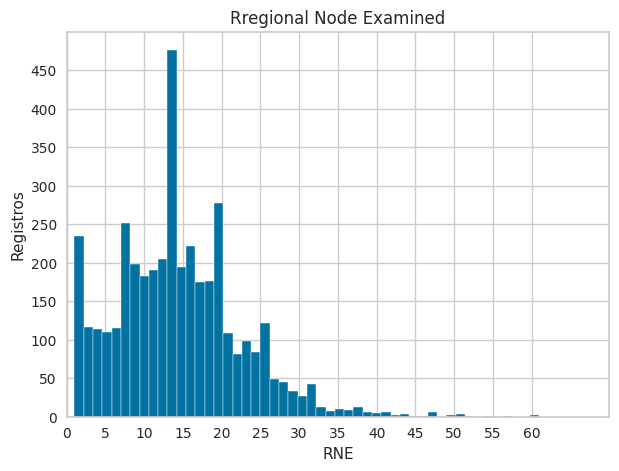

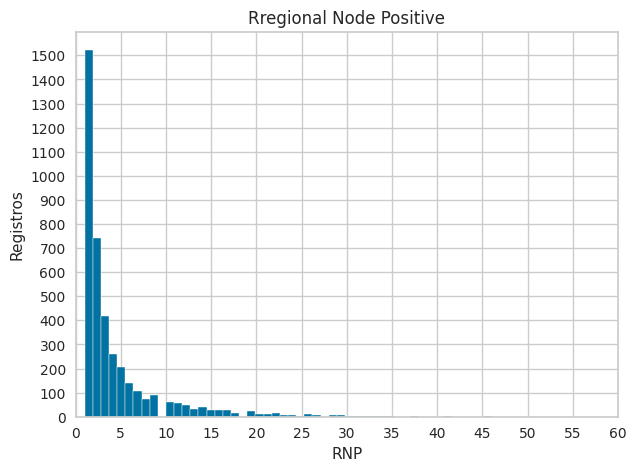

In [159]:
# Histograma de RNE y RNP como categoricos

rne = np.array(dfNodesObject['Regional Node Examined'])
rnp = np.array(dfNodesObject['Regional Node Positive'])

fig, ax = plt.subplots(figsize=(7,5))
ax.hist(rne, bins=50)
ax.set_title('Rregional Node Examined')
ax.set_xlim([0,70])
ax.set_xticks(range(0, 61, 5))
ax.set_xlabel('RNE')
ax.set_yticks(range(0, 500, 50))
ax.set_ylabel('Registros')

fig, ax = plt.subplots(figsize=(7,5))
ax.hist(rnp, bins=50)
ax.set_title('Rregional Node Positive')
ax.set_xlim([0,50])
ax.set_xticks(range(0, 61, 5))
ax.set_xlabel('RNP')
ax.set_yticks(range(0, 1550, 100))
ax.set_ylabel('Registros')

In [160]:
#Revisamos las categorías quiero ver que etiqueta corresponde a que valor asignado
df_reducido_objetos = df_reducido.drop(["Age","RNP/RNE", 'Regional Node Examined', 'Regional Node Positive'], axis=1)

for (etiqueta, content) in df_reducido_objetos.items():
    print(etiqueta)
    print(content.value_counts())


Race
Race
White    3413
Other     320
Black     291
Name: count, dtype: int64
Marital Status
Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
6th Stage
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
Differentiate
Differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64
Estrogen Status
Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64
Progesterone Status
Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64
Sobrevida
Sobrevida
True     2821
False    1203
Name: count, dtype: int64
ES y PS Positivo
ES y PS Positivo
True     3299
False     725
Name: count, dtype: int64


In [ ]:
# muestra lo mismo en ambos dataframes encodeado y no encodeadao
df_reducido_encodeado_objetos = df_reducido_encodeado.drop(["Age","RNP/RNE",'Regional Node Examined', 'Regional Node Positive'], axis=1)

for (etiqueta, content) in df_reducido_encodeado_objetos.items():
    print(etiqueta)
    print(content.value_counts())

Race
Race
White    3413
Other     320
Black     291
Name: count, dtype: int64
Marital Status
Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
6th Stage
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
Differentiate
Differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64
Grade
Grade
2                       2351
3                       1111
1                        543
anaplastic; Grade IV      19
Name: count, dtype: int64
Estrogen Status
Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64
Progesterone Status
Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64
Sobrevida
Sobrevida
True     2821
False    1203
Name: count, dtype: int64
ES y PS Positivo
ES y PS Positivo
True     3299
False  

## Nuevas  Visualizaciones

6th Stage

'\n6th Stage\nIIA     1305\nIIB     1130\nIIIA    1050\nIIIC     472\nIIIB      67\n'

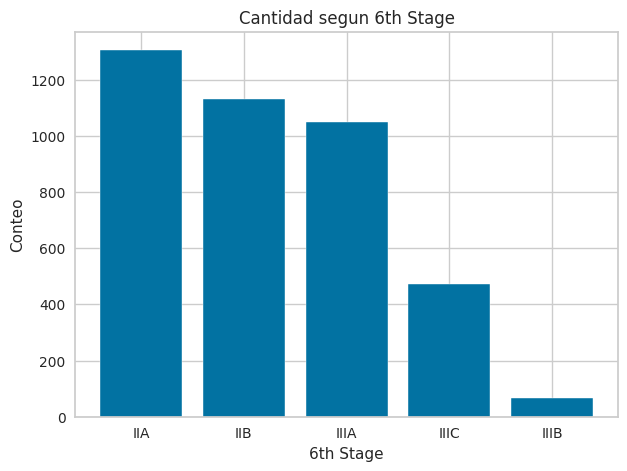

In [161]:
# 6th Stage

elementos6 = df_reducido["6th Stage"].value_counts()
categorias6 = np.unique(df_reducido["6th Stage"])
categorias6 = elementos6.index

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(categorias6, elementos6 )
ax.set_xticklabels(categorias6, fontsize=10)
ax.set_title('Cantidad segun 6th Stage')
ax.set_xlabel('6th Stage')
ax.set_ylabel('Conteo')


"""
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
"""

Differentiate

' Differentiate\nModerately differentiated    2351\nPoorly differentiated        1111\nWell differentiated           543\nUndifferentiated               19\n'

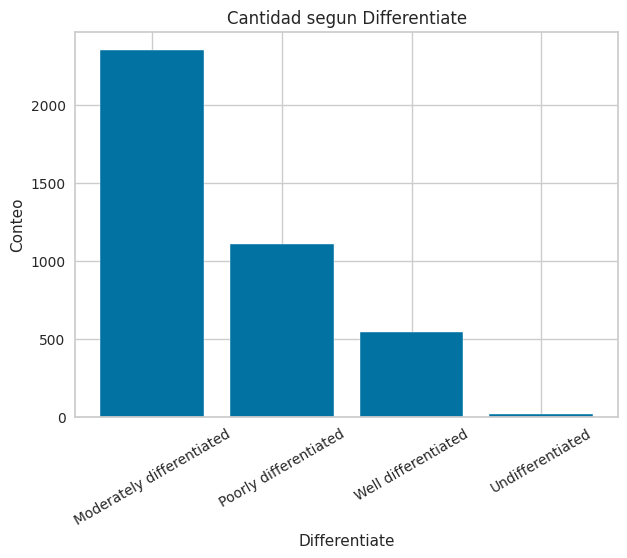

In [162]:
# Differentiate

elementosD = df_reducido["Differentiate"].value_counts()
categoriasD = np.unique(df_reducido["Differentiate"])
categoriasD = elementosD.index

# Crea el gráfico de barras con las categorías ordenadas
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(categoriasD, elementosD)
ax.set_xticklabels(categoriasD, fontsize=10, rotation=30)
ax.set_title('Cantidad segun Differentiate')
ax.set_xlabel('Differentiate')
ax.set_ylabel('Conteo')

# no esta bien el orden segun la tabla siguiente
""" Differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
"""

 Receptores hormonales

In [163]:
df_reducido["Survival Months"] = df["Survival Months"]
df_reducido

Age   Race Marital Status 6th Stage              Differentiate  \
0      68  White        Married       IIA      Poorly differentiated   
1      50  White        Married      IIIA  Moderately differentiated   
2      58  White       Divorced      IIIC  Moderately differentiated   
3      58  White        Married       IIA      Poorly differentiated   
4      47  White        Married       IIB      Poorly differentiated   
...   ...    ...            ...       ...                        ...   
4019   62  Other        Married       IIA  Moderately differentiated   
4020   56  White       Divorced      IIIA  Moderately differentiated   
4021   68  White        Married       IIB  Moderately differentiated   
4022   58  Black       Divorced       IIB  Moderately differentiated   
4023   46  White        Married       IIB  Moderately differentiated   

     Estrogen Status Progesterone Status Regional Node Examined  \
0           Positive            Positive                     24   
1           Positive            Positive                     14   
2           Positive            Positive                     14   
3           Positive            Positive                      2   
4           Positive            Positive                      3   
...              ...                 ...                    ...   
4019        Positive            Positive                      1   
4020        Positive            Positive                     14   
4021        Positive            Negative                     11   
4022        Positive            Positive                     11   
4023        Positive            Positive                      7   

     Regional Node Positive Sobrevida   RNP/RNE ES y PS Positivo  \
0                         1      True  0.041667             True   
1                         5      True  0.357143             True   
2                         7      True  0.500000             True   
3                         1      True  0.500000             True   
4                         1     False  0.333333             True   
...                     ...       ...       ...              ...   
4019                      1     False  1.000000             True   
4020                      8      True  0.571429             True   
4021                      3      True  0.272727            False   
4022                      1      True  0.090909             True   
4023                      2      True  0.285714             True   

      Survival Months  
0                  60  
1                  62  
2                  75  
3                  84  
4                  50  
...               ...  
4019               49  
4020               69  
4021               69  
4022               72  
4023              100  

[4024 rows x 13 columns]

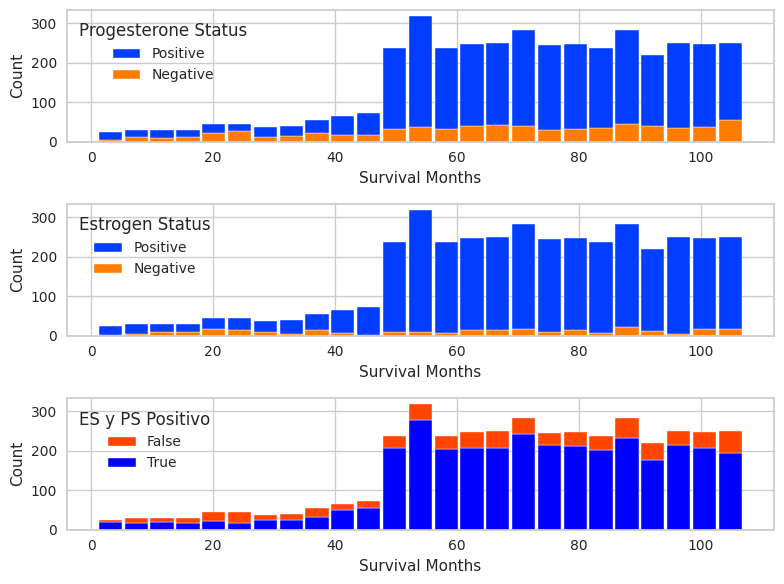

In [164]:
mi_paleta = {0: 'orangered', 1: 'blue'}  # Aquí puedes definir tu propio color

f, axs = plt.subplots(3,1, figsize=(8,6))
sns.histplot(data=df, x="Survival Months", hue="Progesterone Status", multiple="stack", shrink=.9, alpha=1, legend=True,palette="bright", ax=axs[0])
sns.histplot(data=df, x="Survival Months", hue="Estrogen Status", multiple="stack", shrink=.9, alpha=1, legend=True, palette="bright", ax=axs[1])

sns.histplot(data=df_reducido, x="Survival Months", hue="ES y PS Positivo", multiple="stack", shrink=.9, alpha=1, legend=True, palette=mi_paleta ,ax=axs[2])

f.tight_layout()
plt.show()

Aqui agregue la nueva variable al grafico que habiamos visto anteriormente. En azules son de registros con marcadores hormonales positivos, cada uno y luego con ambos positivos, mostrando que son la mayor parte de los registros y que su proporcion es bastante constante con respecto a los meses de sobrevida, por lo que no pareceria ser un factor pronostico.

# ⏏ Conclusiones finales (?)

Con este inicio de nuevas consideraciones espero en los proximos modulos encontrar nuevas maneras de trabajar mis variables para poder encontrar relaciones que con modelos adecuados generen predicciones mas acertadas acerca de la sobrevida de las pacientes.